# **HomeWork 1**

## **Q. 10**

In [33]:
import numpy as np

N = 1000000
samples = np.random.randint(0, N+1, N)
samples = [i/N for i in samples]
A_N = np.mean(samples)
X = (A_N - 0.5) / (2 * np.sqrt(N))

print(f"Average A_N: {A_N}")
print(f"Standardized variable X: {X}")


Average A_N: 0.5002469478730002
Standardized variable X: 1.2347393650008475e-07


## **Q. 11**

### **EDA**

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Basic Data Exploration
print("\n=== Basic Dataset Information ===")
print("\nDataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics by species
print("\n=== Summary Statistics by Species ===")
print(df.groupby('species').describe())



=== Basic Dataset Information ===

Dataset Shape: (344, 7)

Missing Values:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

=== Summary Statistics by Species ===
          bill_length_mm                                                   \
                   count       mean       std   min    25%    50%     75%   
species                                                                     
Adelie             151.0  38.791391  2.663405  32.1  36.75  38.80  40.750   
Chinstrap           68.0  48.833824  3.339256  40.9  46.35  49.55  51.075   
Gentoo             123.0  47.504878  3.081857  40.9  45.30  47.30  49.550   

                bill_depth_mm             ... flipper_length_mm         \
            max         count       mean  ...               75%    max   
species                                   ...                            
Adelie     46.0  

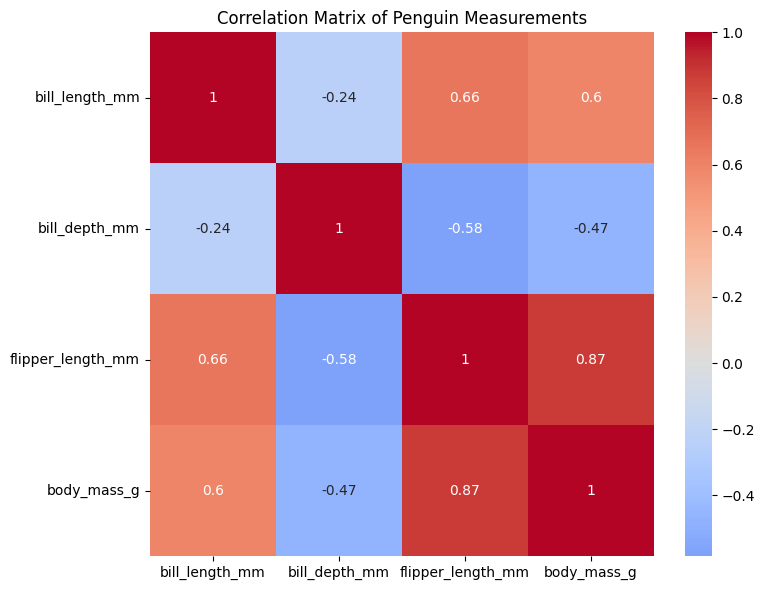

In [35]:
# correlation matrix
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
correlation_matrix = df[numeric_cols].corr()

# visualizations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Penguin Measurements')
plt.tight_layout()
plt.show()


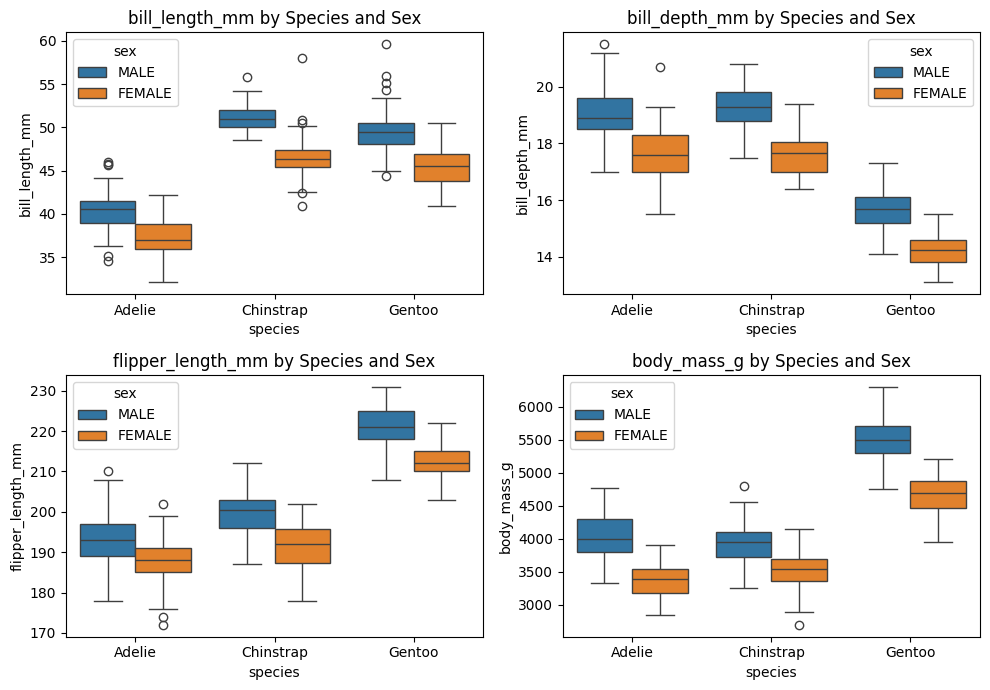

In [36]:
# Distribution plots
plt.figure(figsize=(10, 7))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=df, hue='sex')
    plt.title(f'{column} by Species and Sex')
plt.tight_layout()
plt.show()


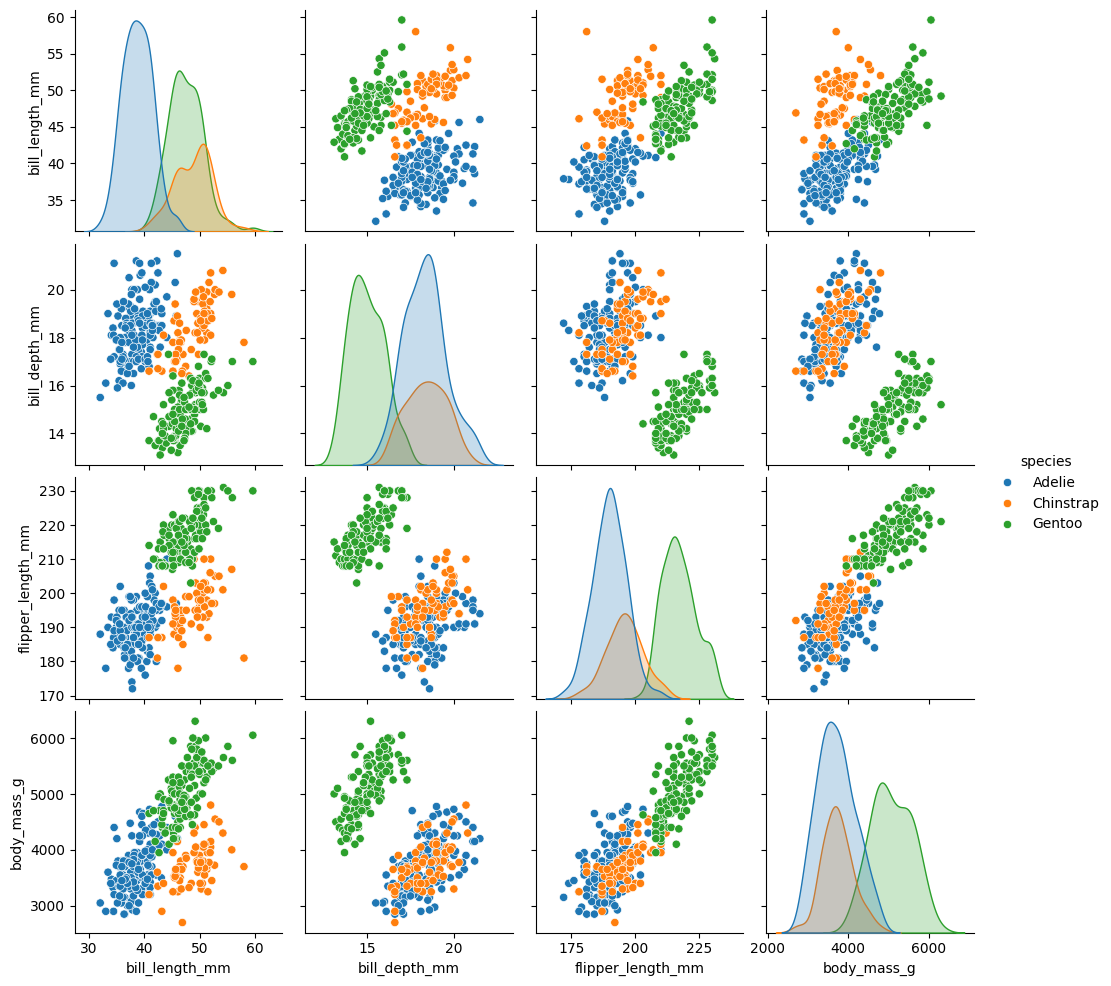

In [37]:
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()

### **Clustering**

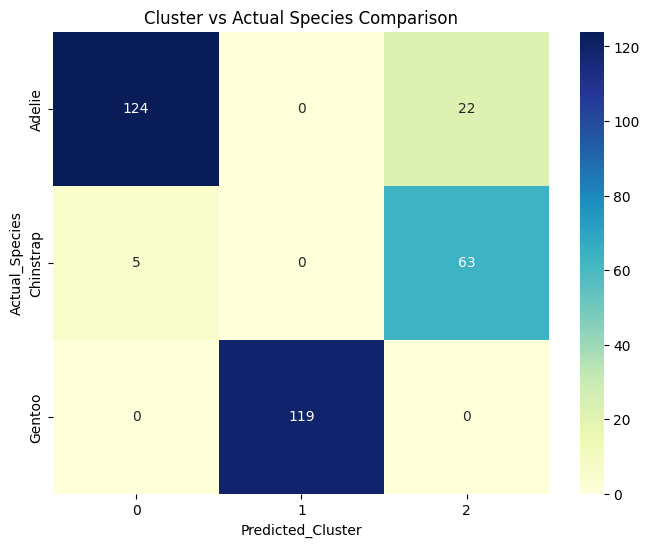

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def prepare_data(df):
    df = df.dropna()
    features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, X, features


def perform_clustering(X_scaled, X, features, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    return clusters

X_scaled, X, features = prepare_data(df)
clusters = perform_clustering(X_scaled, X, features, n_clusters=3)

comparison_df = pd.DataFrame({
    'Actual_Species': df.dropna()['species'],
    'Predicted_Cluster': clusters
})

plt.figure(figsize=(8, 6))
confusion_matrix = pd.crosstab(
    comparison_df['Actual_Species'],
    comparison_df['Predicted_Cluster']
)

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cluster vs Actual Species Comparison')
plt.show()

# Data Collection and Analysis Project

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [40]:
!pip install tabulate

## Data Collection

Data Collection was done through a

In [41]:
file = "https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL251/HomeWork1/Data%20Analysis/spotify_last_fm_data_apr_to_dec_2024.csv"

data = pd.read_csv(file)

## Preprocessing

In [42]:
data.columns = ['Artist', 'Album', 'Title', 'Timestamp']
data.head()
df = data

In [43]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp_IST'] = df['Timestamp'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')
df['Timestamp_IST'] = df['Timestamp_IST'].dt.tz_localize(None)

print(df[['Timestamp', 'Timestamp_IST']].head())


            Timestamp       Timestamp_IST
0 2024-12-31 15:39:00 2024-12-31 21:09:00
1 2024-12-31 15:15:00 2024-12-31 20:45:00
2 2024-12-31 14:26:00 2024-12-31 19:56:00
3 2024-12-31 14:13:00 2024-12-31 19:43:00
4 2024-12-31 14:09:00 2024-12-31 19:39:00


## Time Series Analysis

<Figure size 1000x600 with 0 Axes>

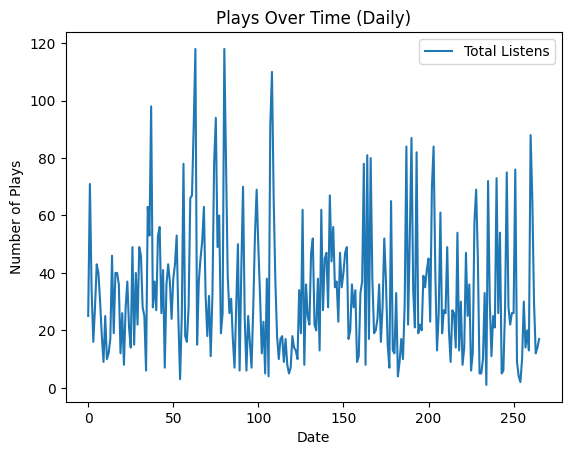

In [44]:
# Aggregate data by day to see total number of listens per day
data['Date'] = data['Timestamp_IST'].dt.date
daily_listens = data.groupby('Date').size().reset_index(name='Total Listens')
daily_listens.head()

plt.figure(figsize=(10, 6))
daily_listens.plot()
plt.title('Plays Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Plays')
plt.show()

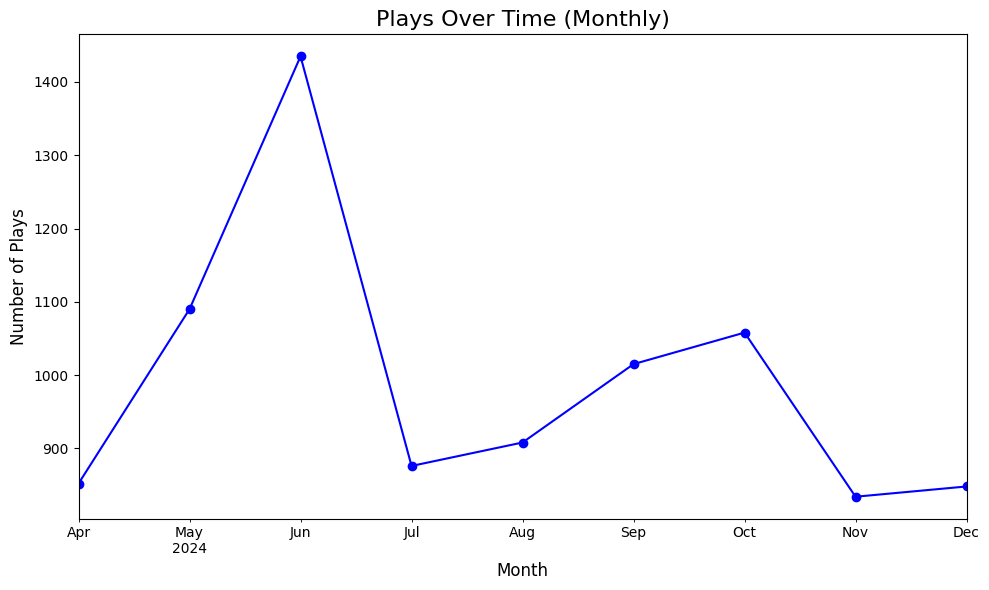

In [45]:
# Group by month and count the plays
plays_by_month = df.groupby(df['Timestamp'].dt.to_period('M')).size()

# Plot the trend over time
plt.figure(figsize=(10, 6))
plays_by_month.plot(kind='line', marker='o', color='b')
plt.title('Plays Over Time (Monthly)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Plays', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


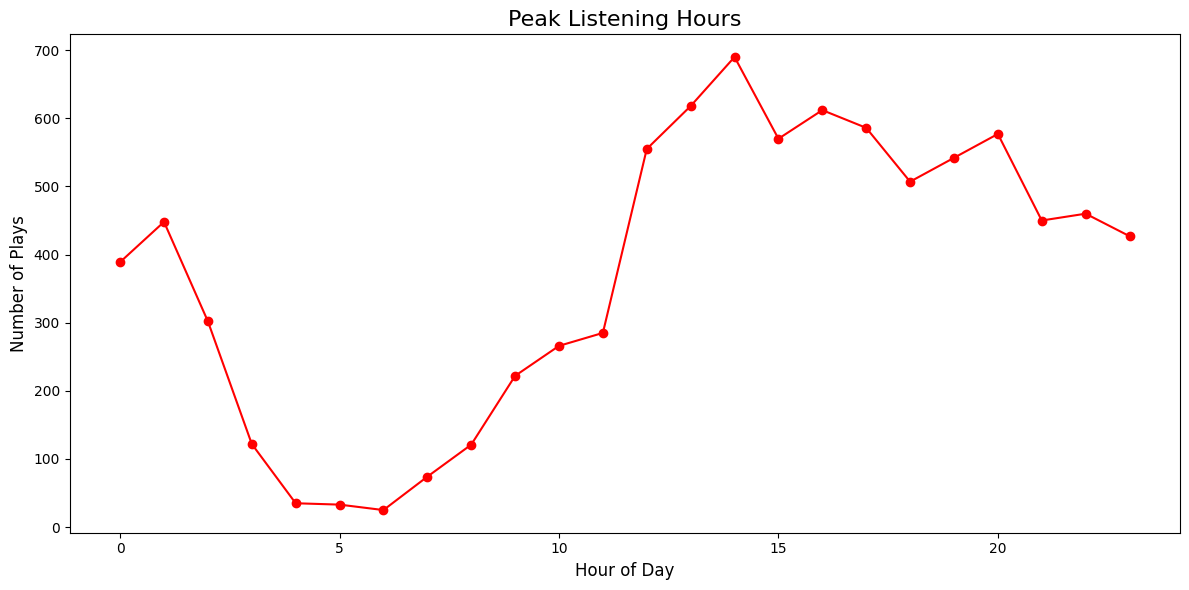

In [46]:
# Group by hour of the day and count the plays
df['Hour of Day'] = df['Timestamp_IST'].dt.hour
peak_hours = df.groupby('Hour of Day').size()

# Plot the peak listening hours
plt.figure(figsize=(12, 6))
peak_hours.plot(kind='line', marker='o', color='red')
plt.title('Peak Listening Hours', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Plays', fontsize=12)
plt.tight_layout()
plt.show()


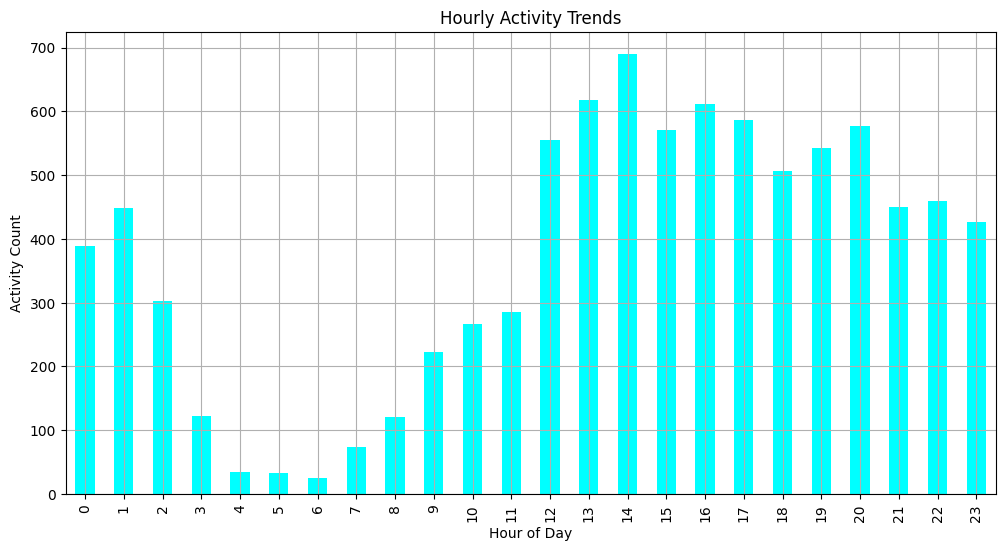

In [47]:
# Group by hour and count entries
hourly_activity = df.groupby(df['Timestamp_IST'].dt.hour).size()

# Plot Hourly Trends
plt.figure(figsize=(12, 6))
hourly_activity.plot(kind='bar', title='Hourly Activity Trends', xlabel='Hour of Day', ylabel='Activity Count', color='cyan')
plt.grid()
plt.show()


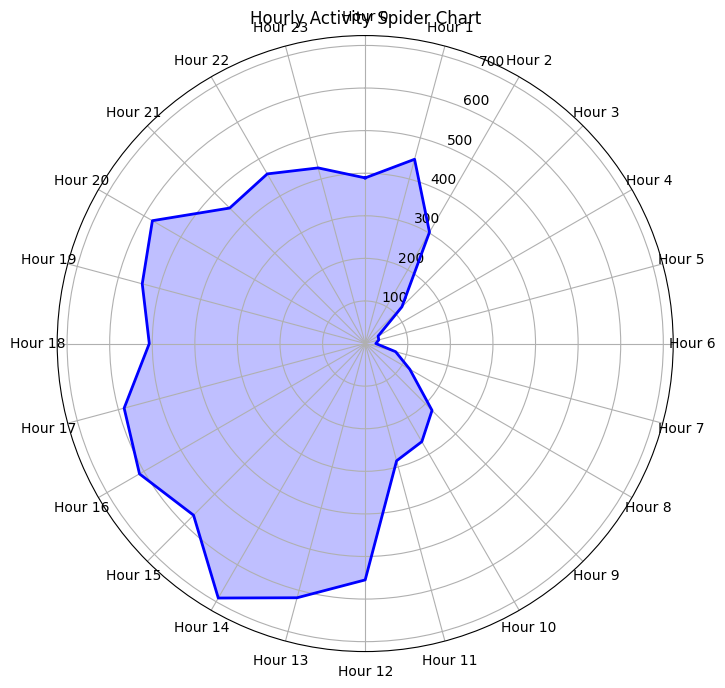

In [48]:
# === Spider Web Plot for Hourly Data ===
labels = [f"Hour {i}" for i in range(24)]
values = hourly_activity.reindex(range(24), fill_value=0).values  #
values = np.append(values, values[0])

angles = np.linspace(0, 2 * np.pi, len(values))

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "polar"})
ax.plot(angles, values, linestyle='-', linewidth=2, color='blue')
ax.fill(angles, values, color='blue', alpha=0.25)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('Hourly Activity Spider Chart', va='bottom')
plt.show()

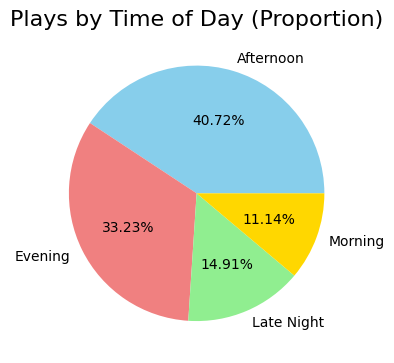

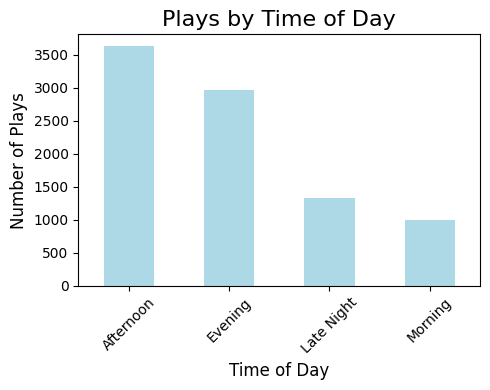

In [49]:
df['Hour'] = df['Timestamp_IST'].dt.hour

# Categorize by Time of Day
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Late Night'

df['Time of Day'] = df['Hour'].apply(categorize_time)

# Count number of plays for each time slot
plays_by_time_of_day = df['Time of Day'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(4, 4))
plays_by_time_of_day.plot(kind='pie', autopct='%1.2f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Plays by Time of Day (Proportion)', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()
print()
# Alternatively, bar chart
plt.figure(figsize=(5, 4))
plays_by_time_of_day.plot(kind='bar', color='lightblue')
plt.title('Plays by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Plays', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

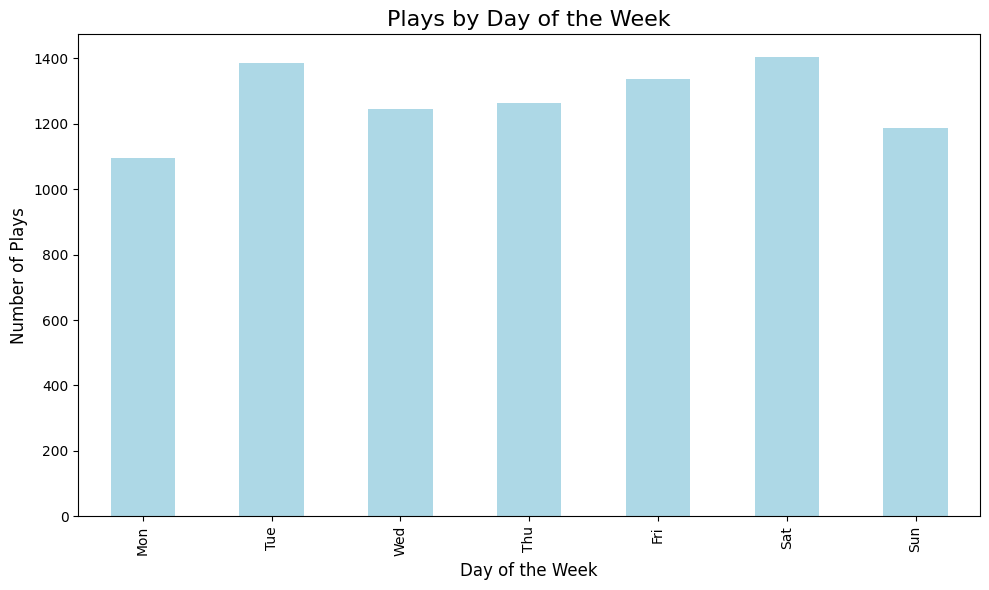

In [50]:
# Extract day of the week (0=Monday, 6=Sunday)
df['Day of Week'] = df['Timestamp'].dt.dayofweek

# Group by Day of Week and count plays
plays_by_day_of_week = df.groupby('Day of Week').size()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plays_by_day_of_week.plot(kind='bar', color='lightblue')
plt.title('Plays by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Plays', fontsize=12)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()


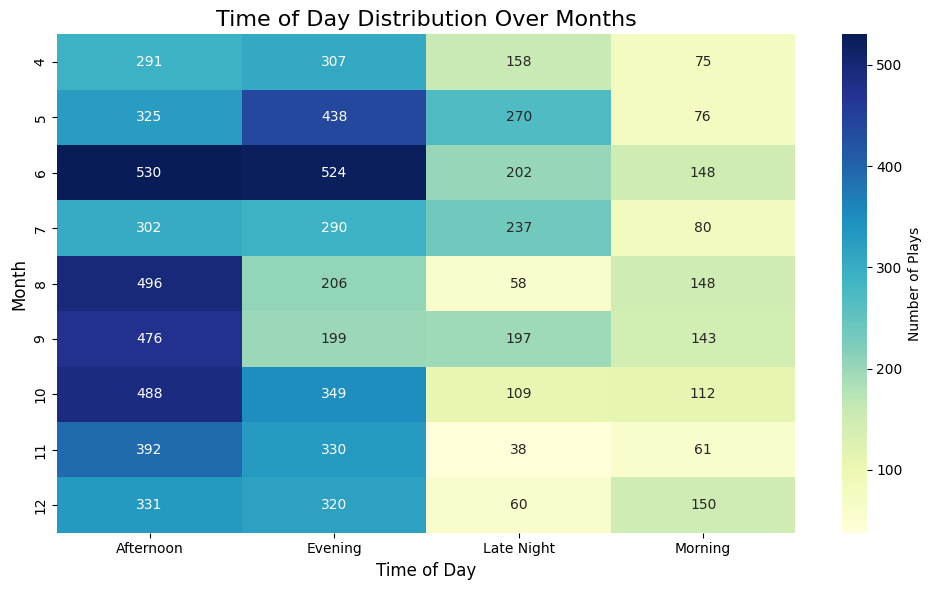

In [51]:
# Extract month from Timestamp
df['Month'] = df['Timestamp_IST'].dt.month

# Pivot table to get counts of plays by Time of Day and Month
heatmap_data = df.groupby(['Month', 'Time of Day']).size().unstack().fillna(0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Number of Plays'})
plt.title('Time of Day Distribution Over Months', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.tight_layout()
plt.show()


## Analysis of Top Artists and Titles

In [52]:
top_5_artists = df['Artist'].value_counts().head(5).index
df_top_5_artists = df[df['Artist'].isin(top_5_artists)]

top_10_artists = df['Artist'].value_counts().head(10).index
df_top_10_artists = df[df['Artist'].isin(top_10_artists)]

top_25_artists = df['Artist'].value_counts().head(25).index
df_top_25_artists = df[df['Artist'].isin(top_25_artists)]



top_5_titles = df['Title'].value_counts().head(5).index
df_top_5_titles = df[df['Title'].isin(top_5_titles)]

top_10_titles = df['Title'].value_counts().head(10).index
df_top_10_titles = df[df['Title'].isin(top_10_titles)]

top_25_titles = df['Title'].value_counts().head(25).index
df_top_25_titles = df[df['Title'].isin(top_25_titles)]



top_5_albums = df['Album'].value_counts().head(5).index
df_top_5_albums = df[df['Album'].isin(top_5_albums)]

top_10_albums = df['Album'].value_counts().head(10).index
df_top_10_albums = df[df['Album'].isin(top_10_albums)]

top_25_albums = df['Album'].value_counts().head(25).index
df_top_25_albums = df[df['Album'].isin(top_25_albums)]

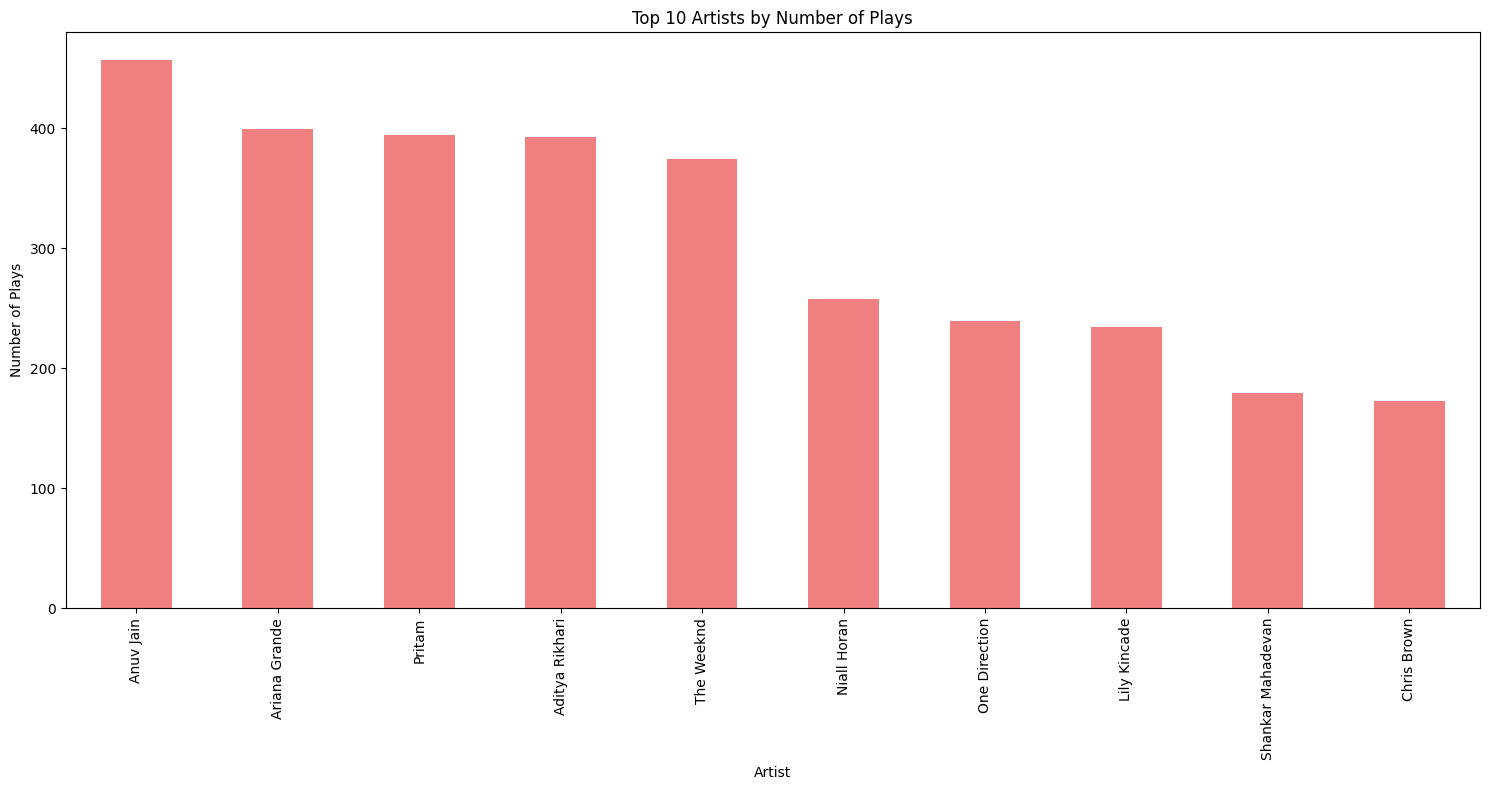

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

# Visualizations for top artists, titles, and albums

# Bar Chart for Top 25 Artists
top_10_artists_count = df_top_10_artists['Artist'].value_counts()

plt.figure(figsize=(15,8))
top_10_artists_count.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Artists by Number of Plays')
plt.xlabel('Artist')
plt.ylabel('Number of Plays')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


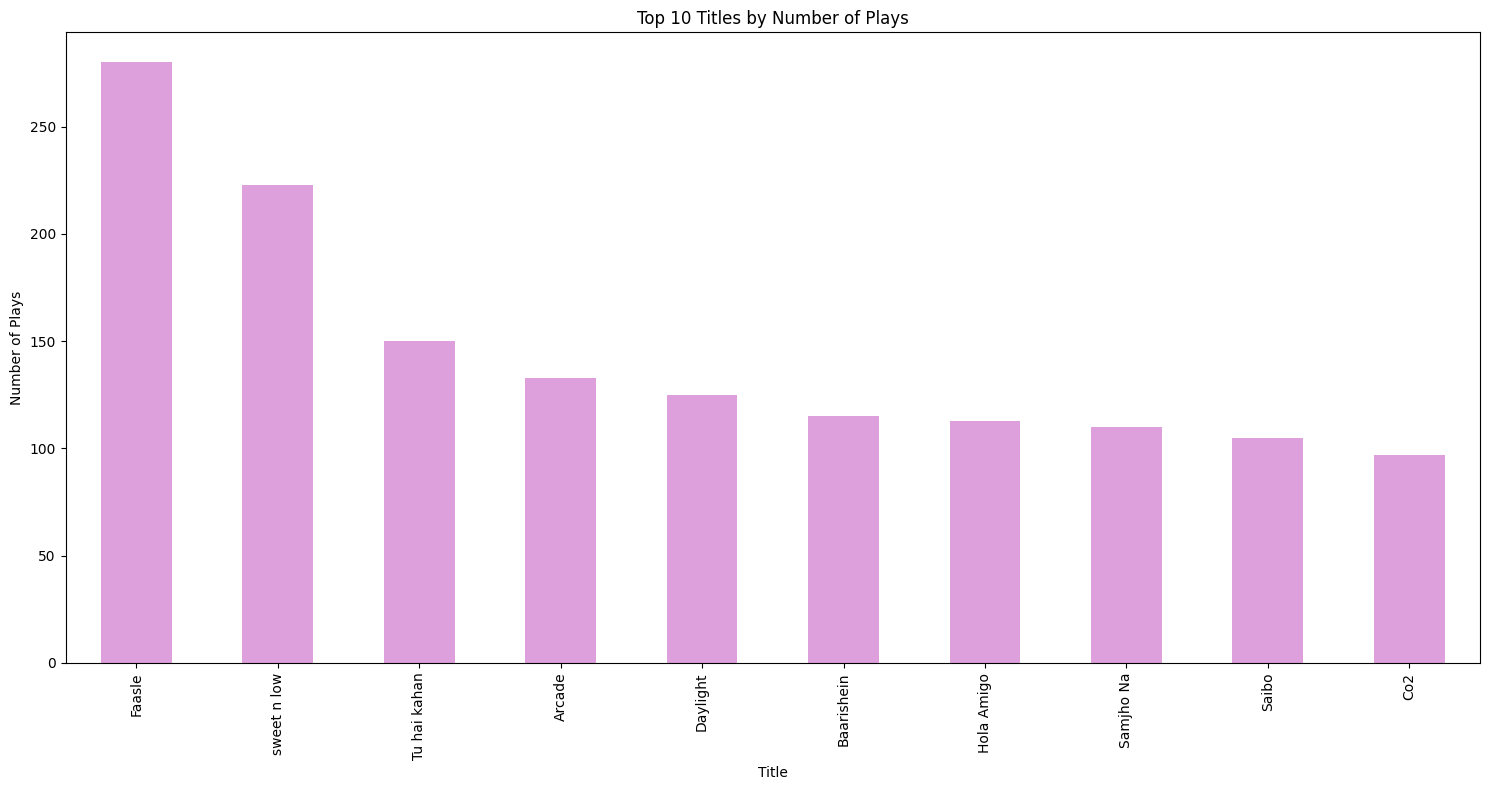

In [54]:
# Bar Chart for Top 10 Titles
top_10_titles_count = df_top_10_titles['Title'].value_counts()

plt.figure(figsize=(15,8))
top_10_titles_count.plot(kind='bar', color='plum')
plt.title('Top 10 Titles by Number of Plays')
plt.xlabel('Title')
plt.ylabel('Number of Plays')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-55-5a1c658e3ea6>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_songs = monthly_counts.groupby('Year-Month', as_index=False).apply(


Monthly Listening Pattern Insights:

1. Analysis Period:
   - Covering 9 months

2. Consistent Favorites:
   - 'Faasle' by Aditya Rikhari
     Appeared in 4 months, averaging 63.5 plays
   - 'sweet n low' by Lily Kincade
     Appeared in 3 months, averaging 70.7 plays
   - 'Daylight' by David Kushner
     Appeared in 2 months, averaging 47.5 plays
   - 'Co2' by Prateek Kuhad
     Appeared in 2 months, averaging 35.5 plays
   - 'Breathless - Album - Breathless 98' by Shankar Mahadevan
     Appeared in 2 months, averaging 34.5 plays
   - 'Samjho Na' by Aditya Rikhari
     Appeared in 2 months, averaging 29.0 plays

3. Monthly Trends:

   2024-04:
   - Total Plays: 201
   - Unique Artists: 5
   - Average Plays per Song: 40.2
   - Top Artist: Duncan Laurence

   2024-05:
   - Total Plays: 224
   - Unique Artists: 5
   - Average Plays per Song: 44.8
   - Top Artist: Chris Brown

   2024-06:
   - Total Plays: 402
   - Unique Artists: 4
   - Average Plays per Song: 80.4
   - Top Artist: Adity

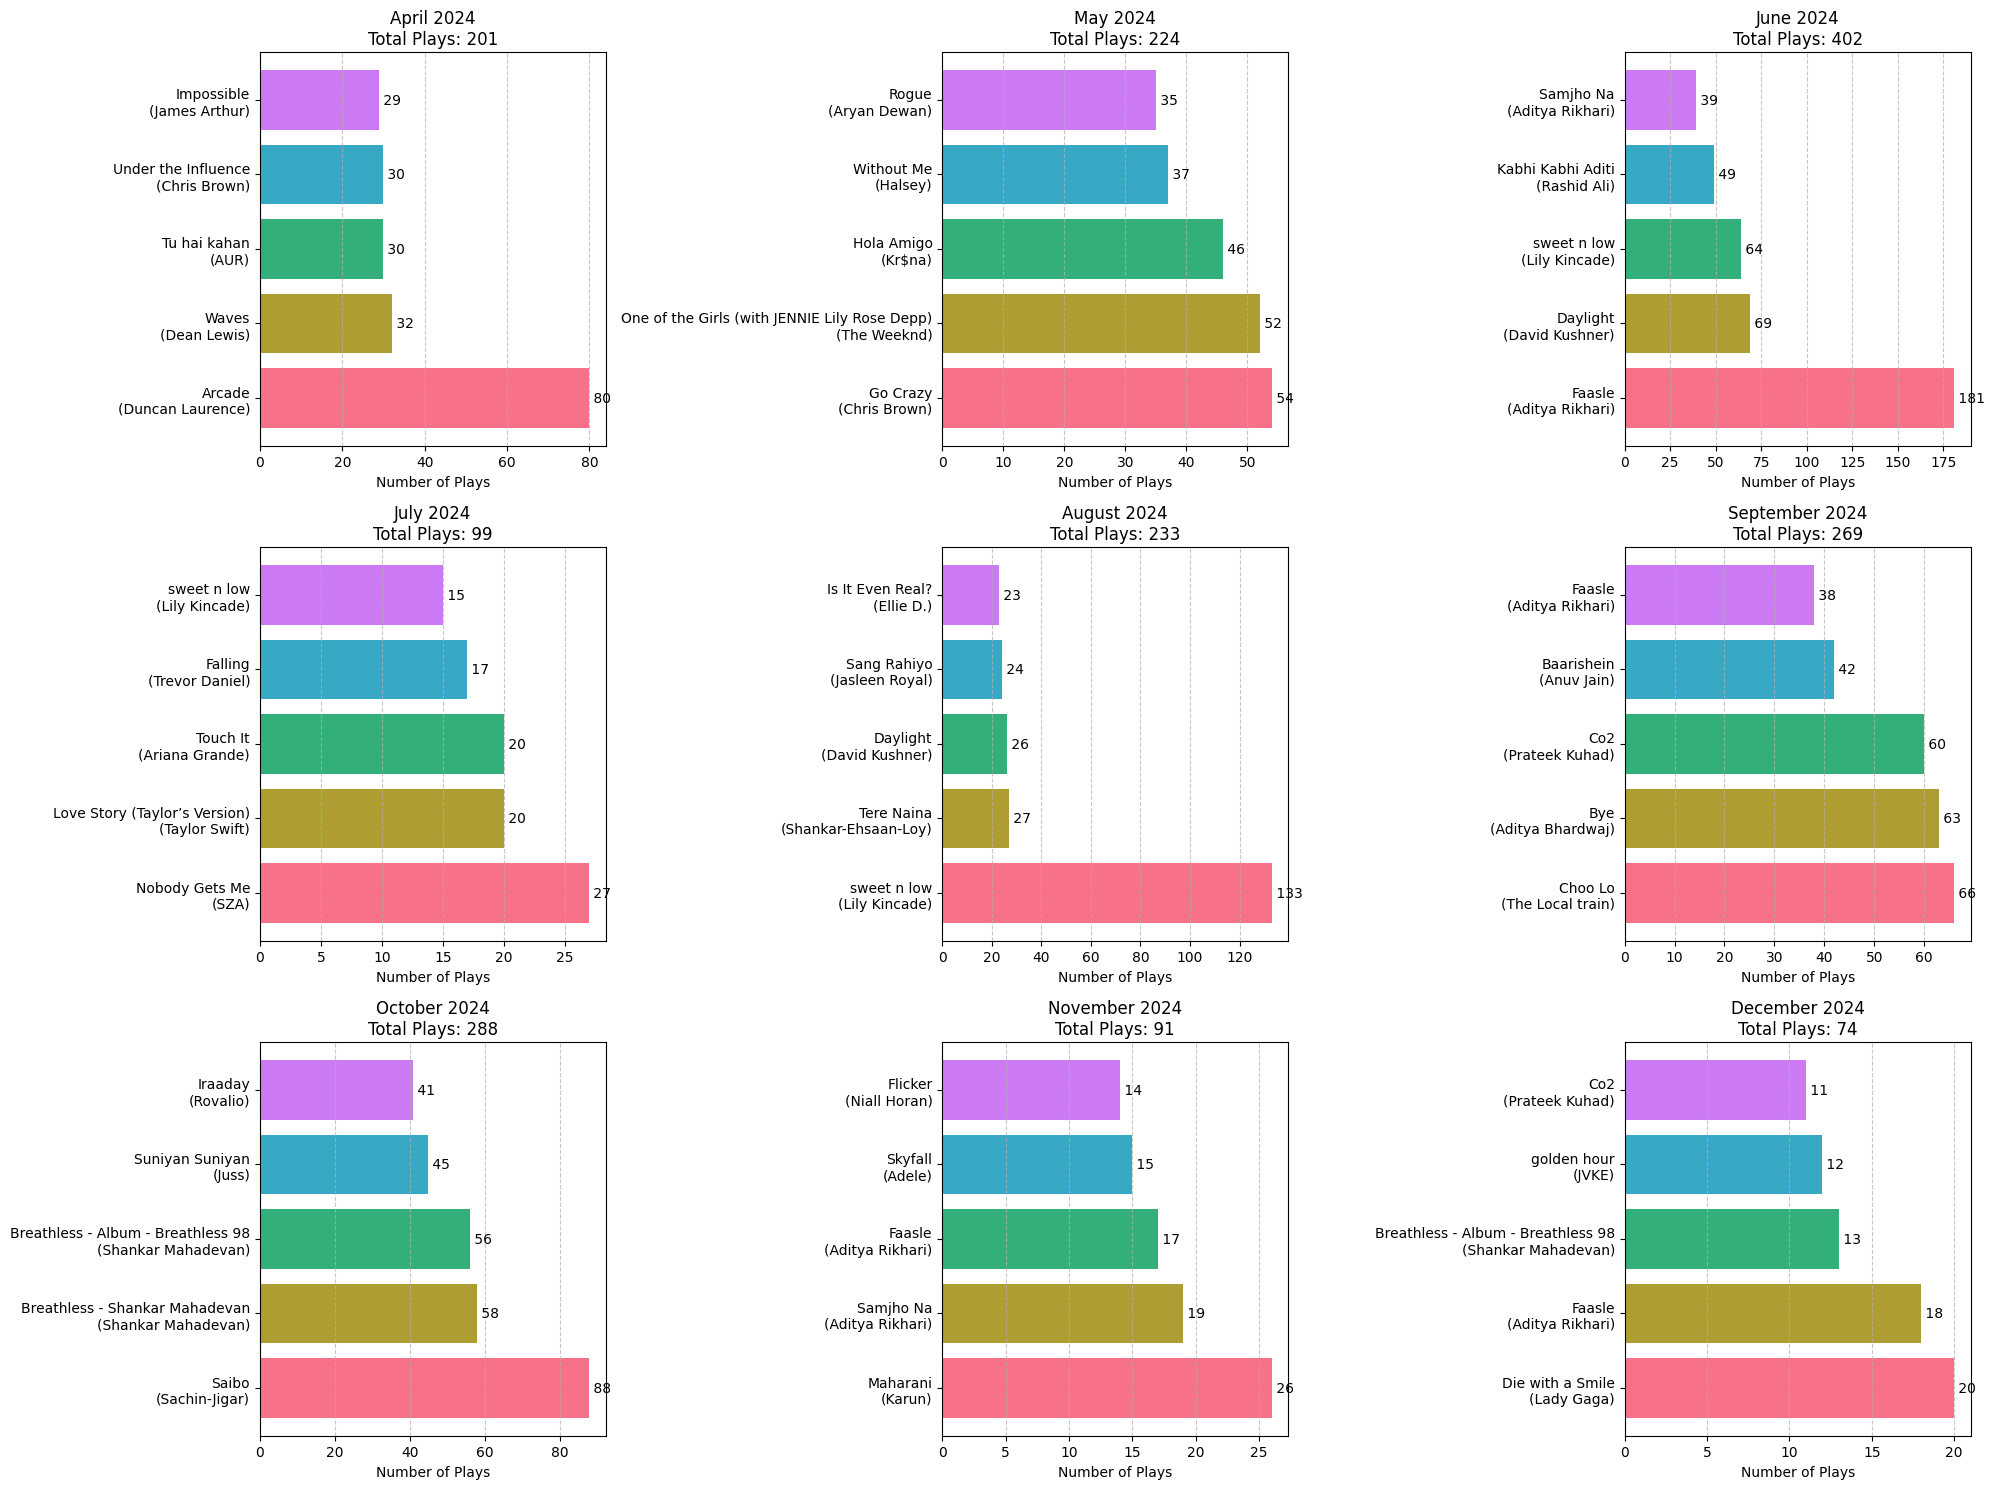

In [55]:
def analyze_monthly_favorites(df, top_n=5, min_plays=2):
    """
    Analyze and visualize top songs for each month

    Parameters:
    - df: DataFrame with columns ['Timestamp_IST', 'Title', 'Artist']
    - top_n: Number of top songs to show per month
    - min_plays: Minimum plays required to be considered

    Returns:
    - fig: matplotlib figure object
    - monthly_data: DataFrame with monthly top songs
    - insights: dict containing additional analysis results
    """
    # Create month-year period and extract month name
    df_analysis = df.copy()
    df_analysis['Year-Month'] = df_analysis['Timestamp_IST'].dt.to_period('M')
    df_analysis['Month'] = df_analysis['Timestamp_IST'].dt.strftime('%B %Y')

    # Get monthly song counts with artist information
    monthly_counts = df_analysis.groupby(['Year-Month', 'Month', 'Title', 'Artist']).size().reset_index(name='Plays')
    monthly_counts = monthly_counts[monthly_counts['Plays'] >= min_plays]

    # Get top N songs per month
    top_songs = monthly_counts.groupby('Year-Month', as_index=False).apply(
        lambda x: x.nlargest(top_n, 'Plays')
    ).reset_index(drop=True)

    # Sort by year-month and plays
    top_songs = top_songs.sort_values(['Year-Month', 'Plays'], ascending=[True, False])

    # Calculate insights
    insights = calculate_monthly_insights(top_songs, df_analysis)

    # Create visualization
    fig = create_monthly_visualization(top_songs, insights)

    return fig, top_songs, insights

def calculate_monthly_insights(top_songs, df):
    """Calculate detailed insights about monthly listening patterns"""

    insights = {
        'total_months': len(top_songs['Year-Month'].unique()),
        'most_popular_songs': [],
        'artist_streaks': [],
        'monthly_trends': {},
        'consistent_favorites': set()
    }

    # Find songs that appear in multiple months
    song_months = top_songs.groupby('Title')['Year-Month'].nunique().sort_values(ascending=False)
    consistent_songs = song_months[song_months > 1]

    for song in consistent_songs.index:
        months_data = top_songs[top_songs['Title'] == song]
        insights['consistent_favorites'].add((
            song,
            months_data['Artist'].iloc[0],
            len(months_data),
            months_data['Plays'].mean()
        ))

    # Calculate monthly trends
    for month in top_songs['Year-Month'].unique():
        month_data = top_songs[top_songs['Year-Month'] == month]
        insights['monthly_trends'][month] = {
            'total_plays': month_data['Plays'].sum(),
            'unique_artists': month_data['Artist'].nunique(),
            'avg_plays': month_data['Plays'].mean(),
            'top_artist': month_data.groupby('Artist')['Plays'].sum().idxmax()
        }

    return insights

def create_monthly_visualization(top_songs, insights):
    """Create visualization for monthly top songs"""

    n_months = len(top_songs['Year-Month'].unique())
    n_cols = 3
    n_rows = (n_months + n_cols - 1) // n_cols

    fig = plt.figure(figsize=(20, 5*n_rows))

    # Create subplots for each month
    for idx, (month, month_data) in enumerate(top_songs.groupby('Year-Month')):
        ax = plt.subplot(n_rows, n_cols, idx+1)

        # Create horizontal bar plot
        bars = ax.barh(
            range(len(month_data)),
            month_data['Plays'],
            color=sns.color_palette("husl", len(month_data))
        )

        # Add song titles and artist names
        labels = [f"{row['Title']}\n({row['Artist']})" for _, row in month_data.iterrows()]
        ax.set_yticks(range(len(month_data)))
        ax.set_yticklabels(labels)

        # Add play count annotations
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax.text(width, i, f' {int(width)}',
                   va='center', fontsize=10)

        # Set title and adjust layout
        ax.set_title(f"{month_data['Month'].iloc[0]}\nTotal Plays: {insights['monthly_trends'][month]['total_plays']}")
        ax.set_xlabel('Number of Plays')

        # Remove y-label as it's redundant
        ax.set_ylabel('')

        # Add grid for better readability
        ax.grid(True, axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    return fig

def print_monthly_insights(insights, top_songs):
    """Print readable insights from the monthly analysis"""

    print("Monthly Listening Pattern Insights:")

    print(f"\n1. Analysis Period:")
    print(f"   - Covering {insights['total_months']} months")

    print("\n2. Consistent Favorites:")
    for song, artist, months, avg_plays in sorted(
        insights['consistent_favorites'],
        key=lambda x: (x[2], x[3]),
        reverse=True
    ):
        print(f"   - '{song}' by {artist}")
        print(f"     Appeared in {months} months, averaging {avg_plays:.1f} plays")

    print("\n3. Monthly Trends:")
    for month, data in insights['monthly_trends'].items():
        print(f"\n   {month}:")
        print(f"   - Total Plays: {data['total_plays']}")
        print(f"   - Unique Artists: {data['unique_artists']}")
        print(f"   - Average Plays per Song: {data['avg_plays']:.1f}")
        print(f"   - Top Artist: {data['top_artist']}")

# Example usage:
# Assuming df is your DataFrame with columns ['Timestamp_IST', 'Title', 'Artist']
fig, monthly_data, insights = analyze_monthly_favorites(df, top_n=5, min_plays=2)
print_monthly_insights(insights, monthly_data)
plt.show()

## Artists and Songs Trends over time

=== ARTIST TRENDING INSIGHTS ===

Overall Statistics:
                Total Plays  Avg Daily Plays  Peak Plays in One Day  \
Artist                                                                
Anuv Jain               457             1.66                     43   
Ariana Grande           399             1.45                     19   
Pritam                  394             1.43                     17   
Aditya Rikhari          393             1.43                     33   
The Weeknd              374             1.36                     23   

                Days Played  
Artist                       
Anuv Jain               112  
Ariana Grande           112  
Pritam                  124  
Aditya Rikhari           90  
The Weeknd              104  

Key Insights:

Anuv Jain:
- Peak listening day: 2024-06-04
- Average daily plays: 1.66
- Total plays: 457
- Number of days played: 112

Ariana Grande:
- Peak listening day: 2024-07-09
- Average daily plays: 1.45
- Total plays: 399
- Numb

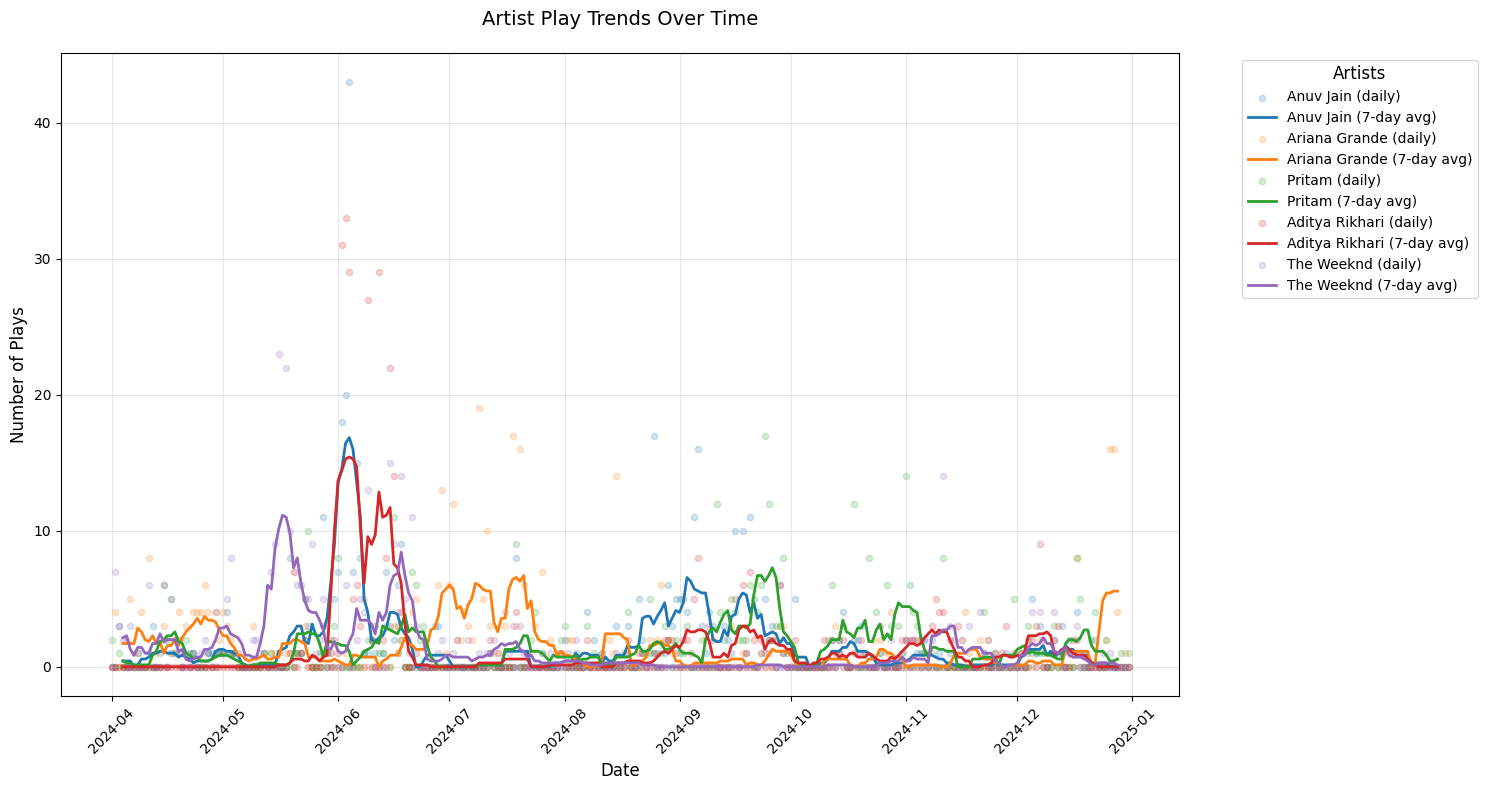

In [56]:
def create_enhanced_artist_trend(df, n_artists=5, window_size=7):
    df = df.copy()
    top_artists = df['Artist'].value_counts().head(n_artists).index
    df_top_artists = df[df['Artist'].isin(top_artists)].copy()
    df_top_artists['Date'] = pd.to_datetime(df_top_artists['Timestamp_IST']).dt.date

    artist_daily = df_top_artists.groupby(['Date', 'Artist']).size().reset_index(name='PlayCount')
    date_range = pd.date_range(min(artist_daily['Date']), max(artist_daily['Date']), freq='D')

    multi_idx = pd.MultiIndex.from_product([date_range.date, top_artists], names=['Date', 'Artist'])
    artist_daily = artist_daily.set_index(['Date', 'Artist']).reindex(multi_idx, fill_value=0).reset_index()

    # Calculate rolling averages
    artist_trends = {}
    for artist in top_artists:
        artist_data = artist_daily[artist_daily['Artist'] == artist].copy()
        artist_data = artist_data.sort_values('Date')
        artist_data['RollingAvg'] = artist_data['PlayCount'].rolling(window=window_size, center=True).mean()
        artist_trends[artist] = artist_data

    # visualization
    fig, ax = plt.subplots(figsize=(15, 8))

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for i, (artist, data) in enumerate(artist_trends.items()):
        color = colors[i % len(colors)]
        ax.scatter(data['Date'], data['PlayCount'], alpha=0.2, color=color, s=20, label=f'{artist} (daily)')
        ax.plot(data['Date'], data['RollingAvg'],
                label=f'{artist} ({window_size}-day avg)',
                color=color,
                linewidth=2)

    ax.set_title('Artist Play Trends Over Time', pad=20, size=14)
    ax.set_xlabel('Date', size=12)
    ax.set_ylabel('Number of Plays', size=12)
    ax.legend(title='Artists',
             title_fontsize=12,
             fontsize=10,
             bbox_to_anchor=(1.05, 1),
             loc='upper left')
    ax.grid(True, alpha=0.3)

    plt.xticks(rotation=45)

    summary_stats = pd.DataFrame({
        'Total Plays': [len(df_top_artists[df_top_artists['Artist'] == artist]) for artist in top_artists],
        'Avg Daily Plays': [artist_daily[artist_daily['Artist'] == artist]['PlayCount'].mean() for artist in top_artists],
        'Peak Plays in One Day': [artist_daily[artist_daily['Artist'] == artist]['PlayCount'].max() for artist in top_artists],
        'Days Played': [artist_daily[artist_daily['Artist'] == artist]['PlayCount'].astype(bool).sum() for artist in top_artists]
    }, index=top_artists)

    plt.tight_layout()

    return fig, summary_stats

def print_trend_insights(df, summary_stats):
    print("=== ARTIST TRENDING INSIGHTS ===")
    print("\nOverall Statistics:")
    print(summary_stats.round(2))

    print("\nKey Insights:")
    for artist in summary_stats.index:
        artist_data = df[df['Artist'] == artist]
        most_played_date = pd.to_datetime(artist_data['Timestamp_IST']).dt.date.value_counts().index[0]
        print(f"\n{artist}:")
        print(f"- Peak listening day: {most_played_date}")
        print(f"- Average daily plays: {summary_stats.loc[artist, 'Avg Daily Plays']:.2f}")
        print(f"- Total plays: {summary_stats.loc[artist, 'Total Plays']}")
        print(f"- Number of days played: {summary_stats.loc[artist, 'Days Played']}")

# Example usage:
fig, summary_stats = create_enhanced_artist_trend(df)
print_trend_insights(df, summary_stats)
plt.show()

=== title TRENDING INSIGHTS ===

Overall Statistics:
              Total Plays  Avg Daily Plays  Peak Plays in One Day  Days Played
Title                                                                         
Faasle                280             1.05                     30           75
sweet n low           223             0.84                     54           31
Tu hai kahan          150             0.56                     10           67
Arcade                133             0.50                     24           44
Daylight              125             0.47                     26           34

Key Insights:

Faasle:
- Peak listening day: 2024-06-03
- Average daily plays: 1.05
- Total plays: 280
- Number of days played: 75

sweet n low:
- Peak listening day: 2024-08-09
- Average daily plays: 0.84
- Total plays: 223
- Number of days played: 31

Tu hai kahan:
- Peak listening day: 2024-05-02
- Average daily plays: 0.56
- Total plays: 150
- Number of days played: 67

Arcade:
- Peak l

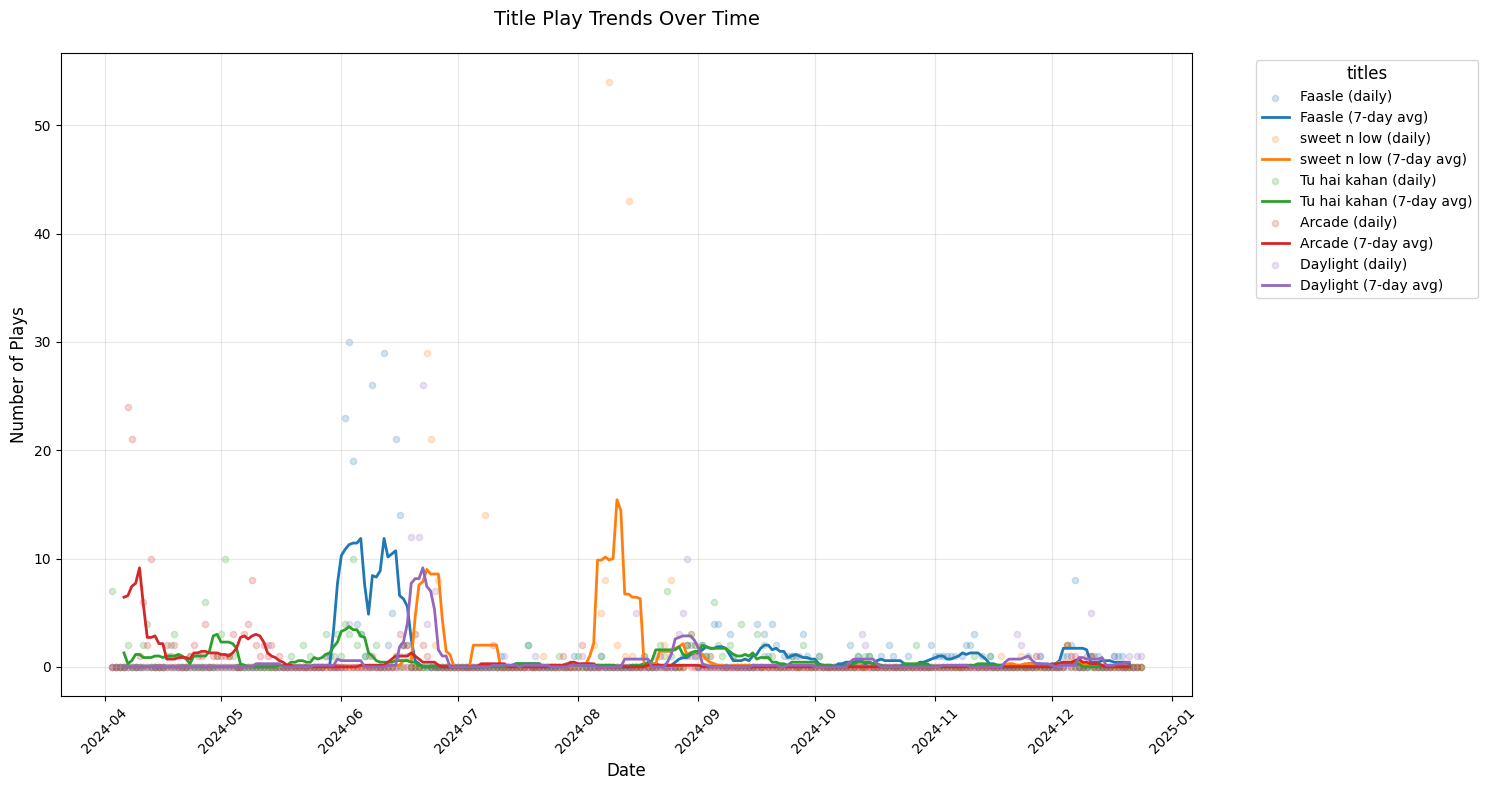

In [57]:
def create_enhanced_title_trend(df, n_titles=5, window_size=7):
    df = df.copy()
    top_titles = df['Title'].value_counts().head(n_titles).index
    df_top_titles = df[df['Title'].isin(top_titles)].copy()
    df_top_titles['Date'] = pd.to_datetime(df_top_titles['Timestamp_IST']).dt.date

    title_daily = df_top_titles.groupby(['Date', 'Title']).size().reset_index(name='PlayCount')
    date_range = pd.date_range(min(title_daily['Date']), max(title_daily['Date']), freq='D')

    multi_idx = pd.MultiIndex.from_product([date_range.date, top_titles], names=['Date', 'Title'])
    title_daily = title_daily.set_index(['Date', 'Title']).reindex(multi_idx, fill_value=0).reset_index()

    # Calculate rolling averages
    title_trends = {}
    for title in top_titles:
        title_data = title_daily[title_daily['Title'] == title].copy()
        title_data = title_data.sort_values('Date')
        title_data['RollingAvg'] = title_data['PlayCount'].rolling(window=window_size, center=True).mean()
        title_trends[title] = title_data

    # visualization
    fig, ax = plt.subplots(figsize=(15, 8))

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for i, (title, data) in enumerate(title_trends.items()):
        color = colors[i % len(colors)]
        ax.scatter(data['Date'], data['PlayCount'], alpha=0.2, color=color, s=20, label=f'{title} (daily)')
        ax.plot(data['Date'], data['RollingAvg'],
                label=f'{title} ({window_size}-day avg)',
                color=color,
                linewidth=2)

    ax.set_title('Title Play Trends Over Time', pad=20, size=14)
    ax.set_xlabel('Date', size=12)
    ax.set_ylabel('Number of Plays', size=12)
    ax.legend(title='titles',
             title_fontsize=12,
             fontsize=10,
             bbox_to_anchor=(1.05, 1),
             loc='upper left')
    ax.grid(True, alpha=0.3)

    plt.xticks(rotation=45)

    summary_stats = pd.DataFrame({
        'Total Plays': [len(df_top_titles[df_top_titles['Title'] == title]) for title in top_titles],
        'Avg Daily Plays': [title_daily[title_daily['Title'] == title]['PlayCount'].mean() for title in top_titles],
        'Peak Plays in One Day': [title_daily[title_daily['Title'] == title]['PlayCount'].max() for title in top_titles],
        'Days Played': [title_daily[title_daily['Title'] == title]['PlayCount'].astype(bool).sum() for title in top_titles]
    }, index=top_titles)

    plt.tight_layout()

    return fig, summary_stats

def print_trend_insights(df, summary_stats):
    print("=== title TRENDING INSIGHTS ===")
    print("\nOverall Statistics:")
    print(summary_stats.round(2))

    print("\nKey Insights:")
    for title in summary_stats.index:
        title_data = df[df['Title'] == title]
        most_played_date = pd.to_datetime(title_data['Timestamp_IST']).dt.date.value_counts().index[0]
        print(f"\n{title}:")
        print(f"- Peak listening day: {most_played_date}")
        print(f"- Average daily plays: {summary_stats.loc[title, 'Avg Daily Plays']:.2f}")
        print(f"- Total plays: {summary_stats.loc[title, 'Total Plays']}")
        print(f"- Number of days played: {summary_stats.loc[title, 'Days Played']}")

# Example usage:
fig, summary_stats = create_enhanced_title_trend(df)
print_trend_insights(df, summary_stats)
plt.show()

<ipython-input-58-7511948ea9f4>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_new_artists = df.groupby([pd.Grouper(key='Timestamp_IST', freq='M'), 'Artist']).first()



2. Most Common Song Sequences:
   - 'sweet n low' → 'sweet n low' (174 times)
   - 'Faasle' → 'Faasle' (140 times)
   - 'Daylight' → 'Daylight' (74 times)
   - 'Breathless - Album - Breathless 98' → 'Breathless - Shankar Mahadevan' (71 times)
   - 'Saibo' → 'Saibo' (64 times)

3. First-time vs Repeat Listens:
   - 12.4% are first-time listens
   - 87.6% are repeat listens

4. Most Loyal Artists:
   - Lily Kincade:
     * Loyalty Score: 2.44
     * Play Frequency: 17.8% of days active
     * Plays per Active Day: 7.31
     * Consistency Score: 0.07
     * Total Plays: 234
     * Active Period: 180 days
   - Shankar Mahadevan:
     * Loyalty Score: 2.07
     * Play Frequency: 11.9% of days active
     * Plays per Active Day: 6.17
     * Consistency Score: 0.08
     * Total Plays: 179
     * Active Period: 243 days
   - Niall Horan:
     * Loyalty Score: 1.92
     * Play Frequency: 24.2% of days active
     * Plays per Active Day: 5.49
     * Consistency Score: 0.10
     * Total Plays: 2

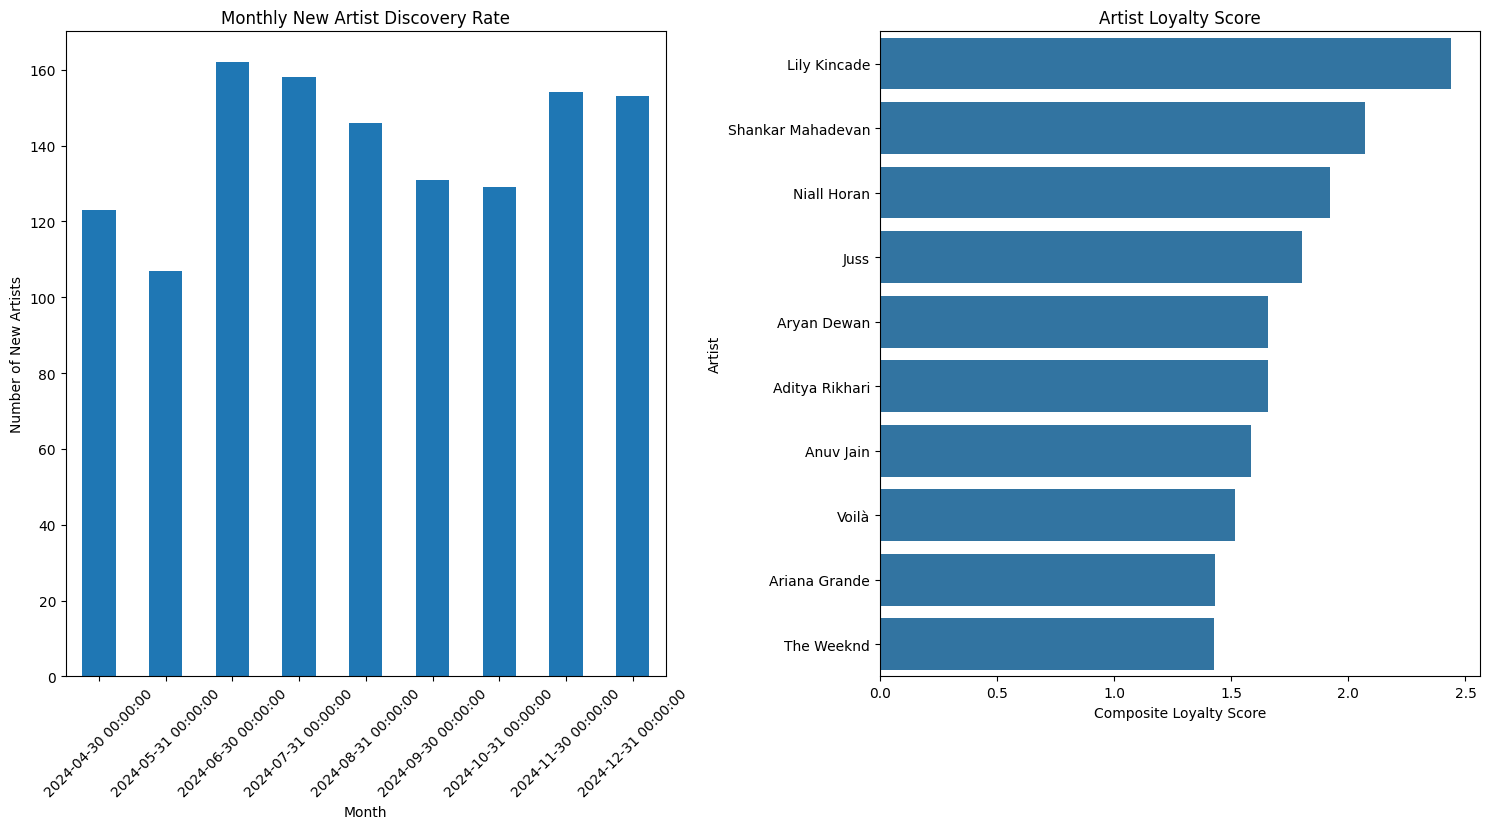

In [58]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_listening_patterns(df):
    df['Timestamp_IST'] = pd.to_datetime(df['Timestamp_IST'])

    df = df.sort_values('Timestamp_IST')

    # Removed repeat listening patterns calculation part

    df['next_song'] = df['Title'].shift(-1)
    df['next_artist'] = df['Artist'].shift(-1)

    song_sequences = df.groupby(['Title', 'next_song']).size().reset_index(name='sequence_count')
    song_sequences = song_sequences.sort_values('sequence_count', ascending=False)

    df['listen_number'] = df.groupby('Title').cumcount() + 1
    first_time_listens = df[df['listen_number'] == 1]
    repeat_listens = df[df['listen_number'] > 1]

    monthly_new_artists = df.groupby([pd.Grouper(key='Timestamp_IST', freq='M'), 'Artist']).first()
    monthly_new_artists = monthly_new_artists.groupby(level=0).size()

    artist_date_ranges = df.groupby('Artist').agg({
        'Timestamp_IST': lambda x: (x.max() - x.min()).days + 1
    }).reset_index()
    artist_date_ranges.columns = ['Artist', 'active_period']

    artist_stats = df.groupby('Artist').agg({
        'Title': 'count',
        'Timestamp_IST': lambda x: len(x.dt.date.unique())
    }).reset_index()
    artist_stats.columns = ['Artist', 'total_plays', 'days_with_plays']

    artist_loyalty = artist_stats.merge(artist_date_ranges, on='Artist')

    artist_loyalty['play_frequency'] = artist_loyalty['days_with_plays'] / artist_loyalty['active_period']
    artist_loyalty['plays_per_active_day'] = artist_loyalty['total_plays'] / artist_loyalty['days_with_plays']

    artist_daily_plays = df.groupby(['Artist', df['Timestamp_IST'].dt.date]).size().reset_index()
    artist_daily_plays.columns = ['Artist', 'Date', 'Plays']

    play_consistency = artist_daily_plays.groupby('Artist')['Plays'].agg(
        lambda x: 1 / (x.std() + 1)
    ).reset_index()
    play_consistency.columns = ['Artist', 'consistency_score']

    artist_loyalty = artist_loyalty.merge(play_consistency, on='Artist')

    artist_loyalty['loyalty_score'] = (
        0.3 * artist_loyalty['play_frequency'] +
        0.3 * artist_loyalty['plays_per_active_day'] +
        0.2 * artist_loyalty['consistency_score'] +
        0.2 * np.log1p(artist_loyalty['total_plays']) / np.log1p(artist_loyalty['total_plays'].max())
    )

    artist_loyalty = artist_loyalty.sort_values('loyalty_score', ascending=False)

    daily_plays = df.groupby(df['Timestamp_IST'].dt.date).size()
    consistency_score = 1 - daily_plays.std() / daily_plays.mean()

    return {
        'song_sequences': song_sequences.head(10),
        'first_time_ratio': len(first_time_listens) / len(df),
        'discovery_rate': monthly_new_artists,
        'artist_loyalty': artist_loyalty.head(10),
        'consistency_score': consistency_score
    }

def plot_analysis_results(results):
    fig = plt.figure(figsize=(15, 15))

    # Removed the plot for repeat listening patterns

    plt.subplot(2, 2, 1)
    results['discovery_rate'].plot(kind='bar')
    plt.title('Monthly New Artist Discovery Rate')
    plt.xlabel('Month')
    plt.ylabel('Number of New Artists')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 2)
    loyalty_data = results['artist_loyalty'].head(10)
    sns.barplot(data=loyalty_data,
                x='loyalty_score', y='Artist')
    plt.title('Artist Loyalty Score')
    plt.xlabel('Composite Loyalty Score')

    plt.tight_layout()
    return fig

def generate_report(results):
    report = []

    # Removed the section for repeat listening patterns

    report.append("\n2. Most Common Song Sequences:")
    for _, row in results['song_sequences'].head(5).iterrows():
        report.append(f"   - '{row['Title']}' → '{row['next_song']}' ({row['sequence_count']} times)")

    report.append(f"\n3. First-time vs Repeat Listens:")
    report.append(f"   - {results['first_time_ratio']*100:.1f}% are first-time listens")
    report.append(f"   - {(1-results['first_time_ratio'])*100:.1f}% are repeat listens")

    report.append("\n4. Most Loyal Artists:")
    for _, row in results['artist_loyalty'].head(5).iterrows():
        report.append(f"   - {row['Artist']}:")
        report.append(f"     * Loyalty Score: {row['loyalty_score']:.2f}")
        report.append(f"     * Play Frequency: {row['play_frequency']*100:.1f}% of days active")
        report.append(f"     * Plays per Active Day: {row['plays_per_active_day']:.2f}")
        report.append(f"     * Consistency Score: {row['consistency_score']:.2f}")
        report.append(f"     * Total Plays: {row['total_plays']}")
        report.append(f"     * Active Period: {row['active_period']} days")

    report.append(f"\n5. Overall Listening Consistency Score: {results['consistency_score']:.2f}")

    return "\n".join(report)

results = analyze_listening_patterns(df)
plot_analysis_results(results)
report = generate_report(results)
print(report)


## Session Analysis

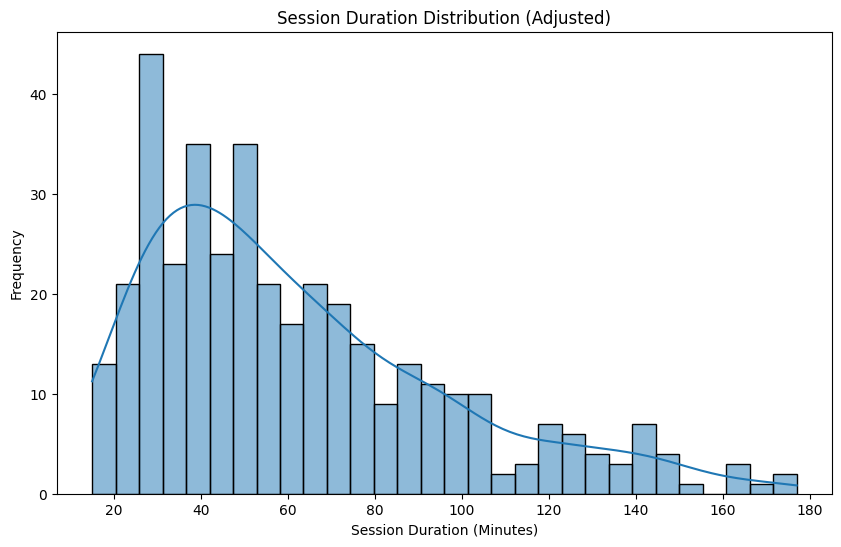

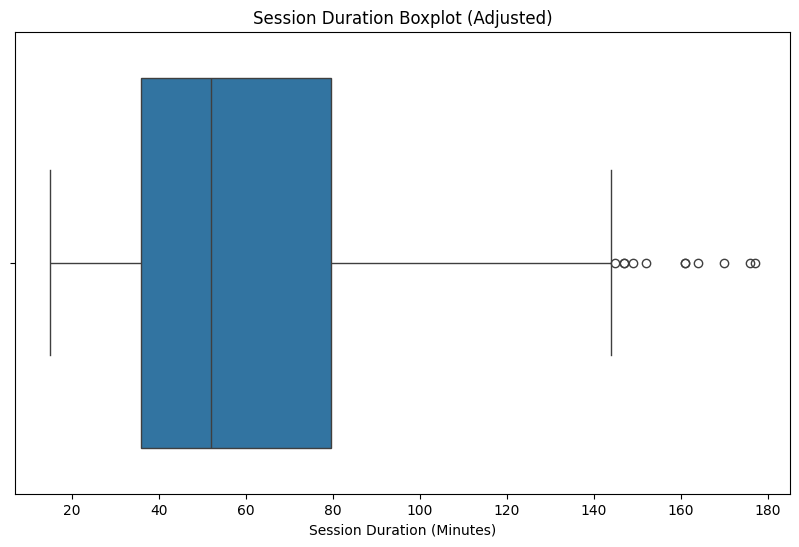

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Timestamp_IST'] = pd.to_datetime(df['Timestamp_IST'])

df = df.sort_values(by='Timestamp_IST')

sessions = []
current_session = []

session_gap = 20
min_songs_in_session = 7
max_session_duration = 180

for i in range(1, len(df)):
    current_song = df.iloc[i]
    previous_song = df.iloc[i - 1]


    time_gap = (current_song['Timestamp_IST'] - previous_song['Timestamp_IST']).total_seconds() / 60
    if time_gap <= session_gap:
        current_session.append(current_song)
    else:
        if len(current_session) >= min_songs_in_session:
            session_start = current_session[0]['Timestamp_IST']
            session_end = current_session[-1]['Timestamp_IST']
            session_duration = (session_end - session_start).total_seconds() / 60


            if session_duration <= max_session_duration:
                sessions.append(session_duration)
        current_session = [current_song]

if len(current_session) >= min_songs_in_session:
    session_start = current_session[0]['Timestamp_IST']
    session_end = current_session[-1]['Timestamp_IST']
    session_duration = (session_end - session_start).total_seconds() / 60


    if session_duration <= max_session_duration:
        sessions.append(session_duration)

session_df = pd.DataFrame(sessions, columns=['Session_Duration'])

plt.figure(figsize=(10, 6))
sns.histplot(session_df['Session_Duration'], kde=True, bins=30)
plt.title('Session Duration Distribution (Adjusted)')
plt.xlabel('Session Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=session_df['Session_Duration'])
plt.title('Session Duration Boxplot (Adjusted)')
plt.xlabel('Session Duration (Minutes)')
plt.show()


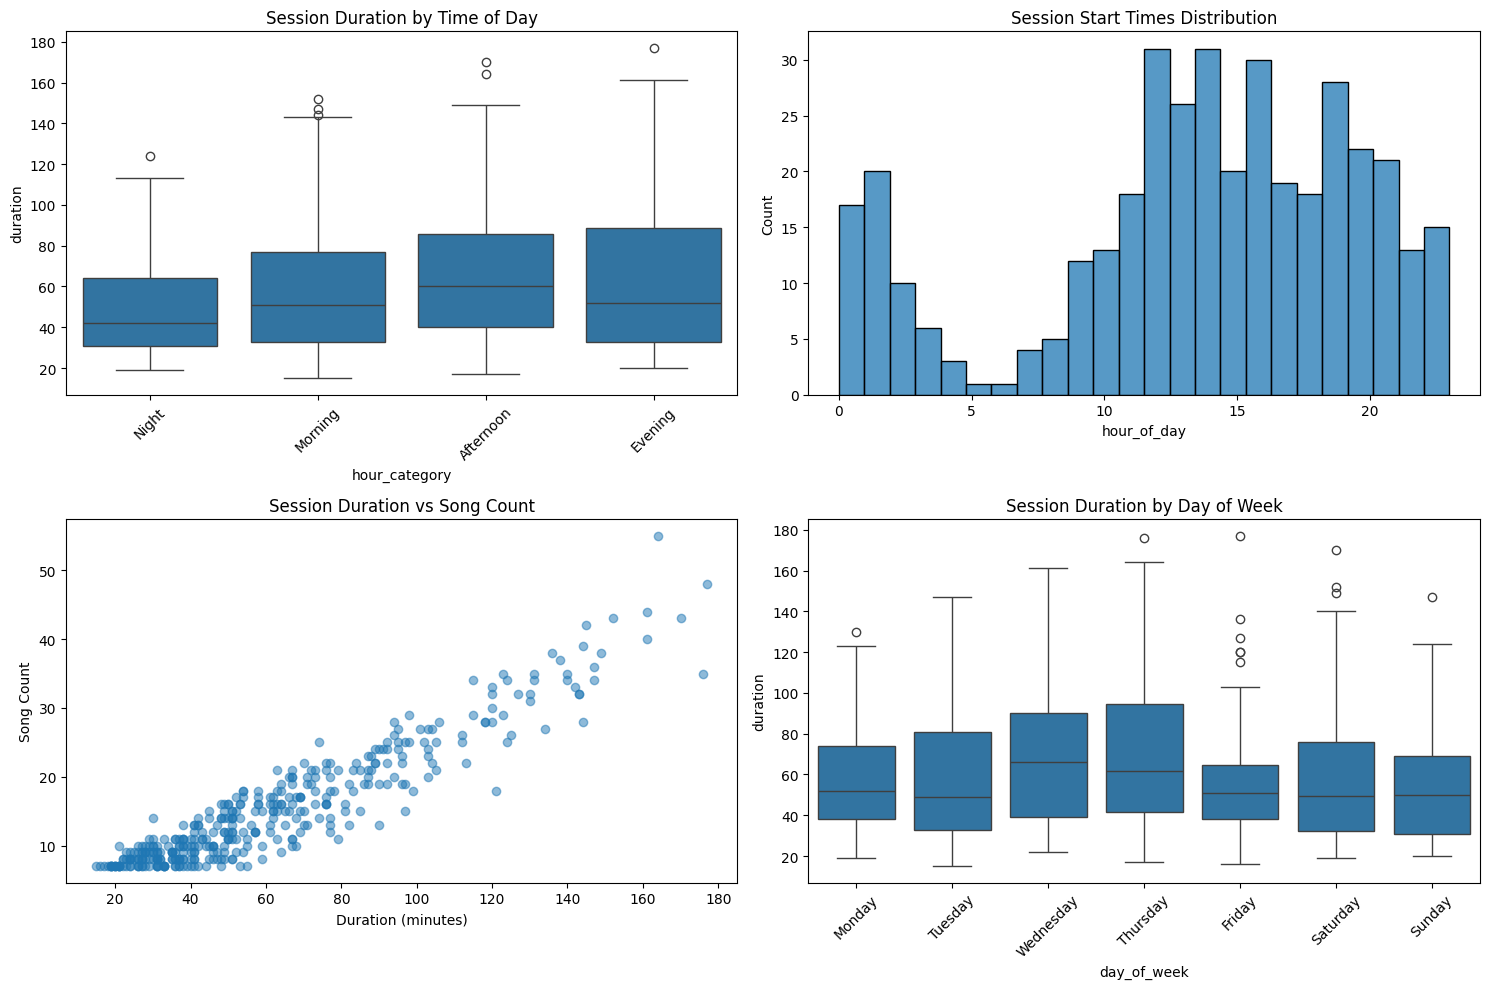

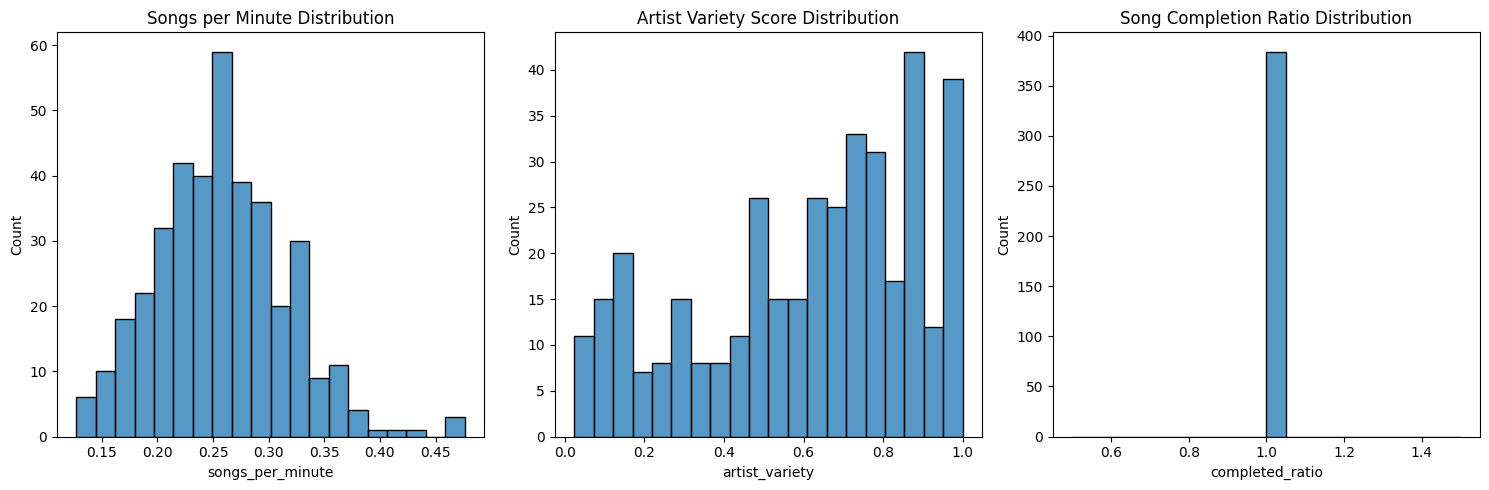


Session Analysis Summary:
Total number of sessions: 384
Average session duration: 62.02 minutes
Average songs per session: 15.35
Most common session start time: Afternoon
Most active day: Tuesday

Engagement Metrics:
Average songs per minute: 0.26
Average artist variety score: 0.61
Average song completion ratio: 1.00


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

def analyze_sessions(df, session_gap=20, min_songs=7, max_duration=180):
    """
    Comprehensive session analysis function that extracts various metrics and patterns
    from user listening sessions.
    """
    df = df.sort_values(by='Timestamp_IST').copy()

    sessions = []
    current_session = []
    all_session_songs = []

    for i in range(1, len(df)):
        current_song = df.iloc[i]
        previous_song = df.iloc[i - 1]

        time_gap = (current_song['Timestamp_IST'] - previous_song['Timestamp_IST']).total_seconds() / 60

        if time_gap <= session_gap:
            current_session.append(current_song)
        else:
            if len(current_session) >= min_songs:
                process_session(current_session, sessions, all_session_songs, max_duration)
            current_session = [current_song]


    if len(current_session) >= min_songs:
        process_session(current_session, sessions, all_session_songs, max_duration)


    session_df = pd.DataFrame(sessions)


    calculate_session_metrics(session_df)


    create_session_visualizations(session_df)

    return session_df, all_session_songs

def process_session(session, sessions, all_session_songs, max_duration):
    """Process individual session and extract metrics"""
    session_start = session[0]['Timestamp_IST']
    session_end = session[-1]['Timestamp_IST']
    duration = (session_end - session_start).total_seconds() / 60

    if duration <= max_duration:
        session_data = {
            'session_start': session_start,
            'session_end': session_end,
            'duration': duration,
            'song_count': len(session),
            'unique_artists': len(set([song['Artist'] for song in session])),
            'hour_of_day': session_start.hour,
            'day_of_week': session_start.day_name(),
            'avg_gap': np.mean([
                (session[i+1]['Timestamp_IST'] - session[i]['Timestamp_IST']).total_seconds() / 60
                for i in range(len(session)-1)
            ]),
            'completed_ratio': sum([1 for song in session if song.get('Completed', True)]) / len(session)
        }

        sessions.append(session_data)
        all_session_songs.extend([(s['Title'], s['Artist']) for s in session])

def calculate_session_metrics(session_df):
    """Calculate additional session-level metrics"""
    session_df['hour_category'] = pd.cut(
        session_df['hour_of_day'],
        bins=[0, 6, 12, 18, 24],
        labels=['Night', 'Morning', 'Afternoon', 'Evening']
    )

    session_df['songs_per_minute'] = session_df['song_count'] / session_df['duration']
    session_df['artist_variety'] = session_df['unique_artists'] / session_df['song_count']

def create_session_visualizations(session_df):
    """Create comprehensive visualizations for session analysis"""

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))


    sns.boxplot(data=session_df, x='hour_category', y='duration', ax=ax1)
    ax1.set_title('Session Duration by Time of Day')
    ax1.tick_params(axis='x', rotation=45)


    sns.histplot(data=session_df, x='hour_of_day', bins=24, ax=ax2)
    ax2.set_title('Session Start Times Distribution')


    ax3.scatter(session_df['duration'], session_df['song_count'], alpha=0.5)
    ax3.set_title('Session Duration vs Song Count')
    ax3.set_xlabel('Duration (minutes)')
    ax3.set_ylabel('Song Count')


    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.boxplot(data=session_df, x='day_of_week', y='duration', order=day_order, ax=ax4)
    ax4.set_title('Session Duration by Day of Week')
    ax4.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))


    sns.histplot(data=session_df, x='songs_per_minute', bins=20, ax=ax1)
    ax1.set_title('Songs per Minute Distribution')


    sns.histplot(data=session_df, x='artist_variety', bins=20, ax=ax2)
    ax2.set_title('Artist Variety Score Distribution')


    sns.histplot(data=session_df, x='completed_ratio', bins=20, ax=ax3)
    ax3.set_title('Song Completion Ratio Distribution')

    plt.tight_layout()
    plt.show()
session_df, all_session_songs = analyze_sessions(df)
print("\nSession Analysis Summary:")
print(f"Total number of sessions: {len(session_df)}")
print(f"Average session duration: {session_df['duration'].mean():.2f} minutes")
print(f"Average songs per session: {session_df['song_count'].mean():.2f}")
print(f"Most common session start time: {session_df['hour_category'].mode()[0]}")
print(f"Most active day: {session_df['day_of_week'].mode()[0]}")
print("\nEngagement Metrics:")
print(f"Average songs per minute: {session_df['songs_per_minute'].mean():.2f}")
print(f"Average artist variety score: {session_df['artist_variety'].mean():.2f}")
print(f"Average song completion ratio: {session_df['completed_ratio'].mean():.2f}")

## Correlation Analysis

Key Insights from Artist Correlation Analysis:

1. Strongest Positive Correlation:
   Anuv Jain and Anuv Jain: 1.000

2. Strongest Negative Correlation:
   Ariana Grande and Anuv Jain: -0.119

3. Most Consistent Artist:
   Pritam
   Active on 124 days

4. Highest Daily Play Intensity:
   Lily Kincade
   Average of 7.31 plays per active day

5. Notable Patterns:
   Artists with correlation > 0.3:
   - Aditya Rikhari and Anuv Jain: 0.610
   - Anuv Jain and Aditya Rikhari: 0.610
   - Ariana Grande and One Direction: 0.380
   - One Direction and Ariana Grande: 0.380


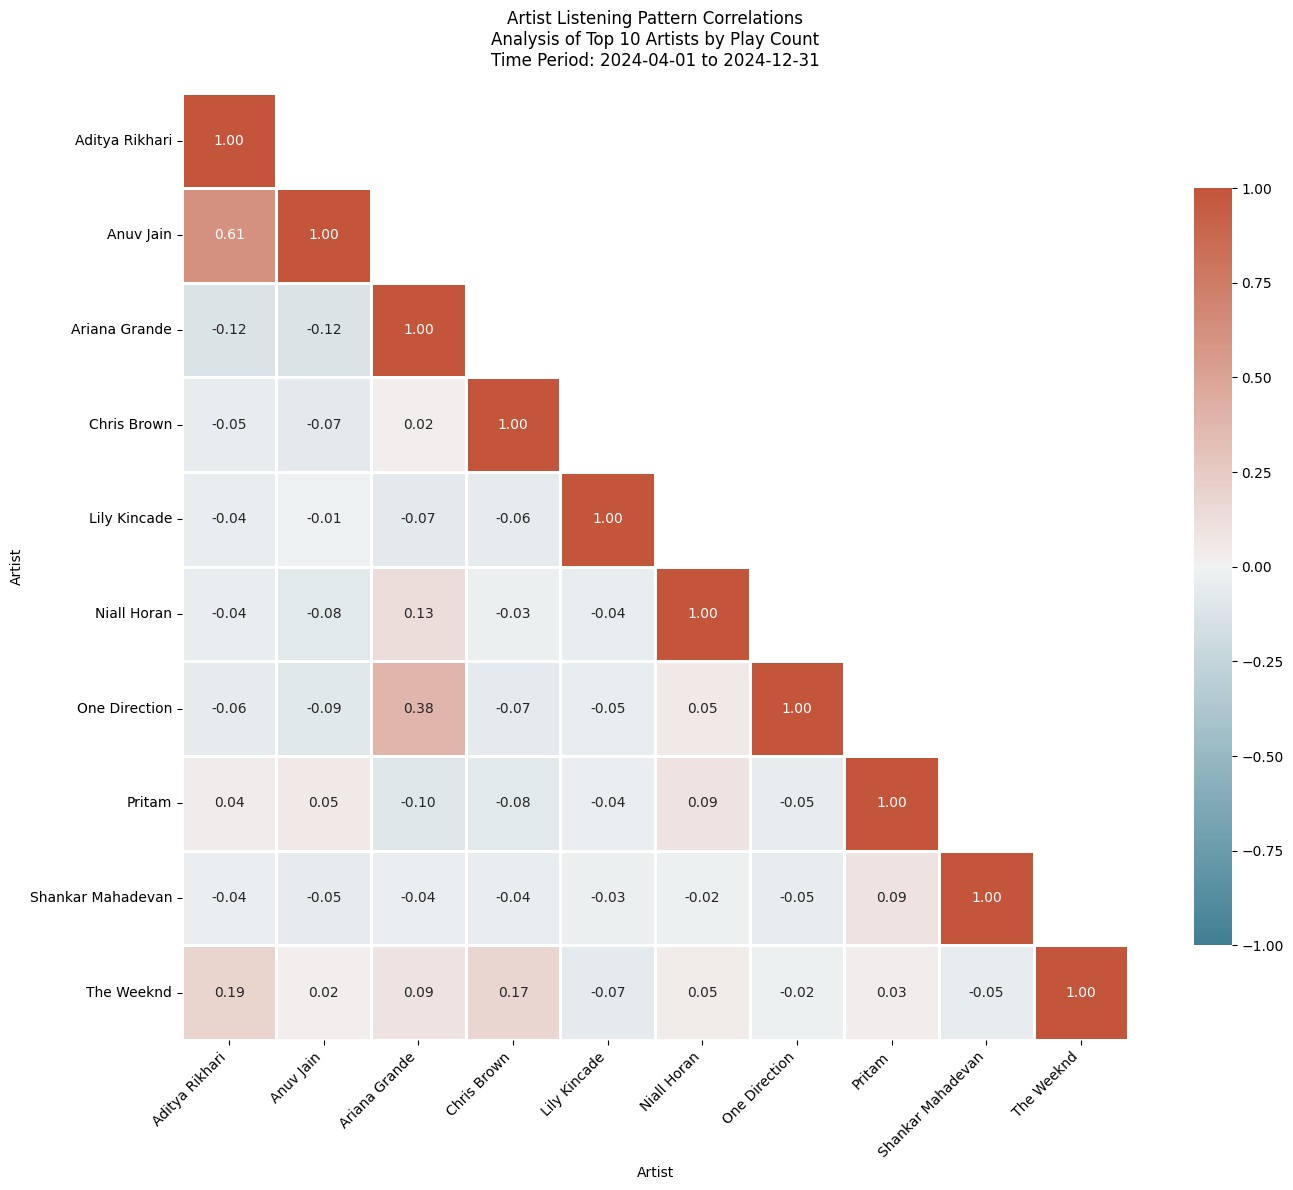

In [61]:
def analyze_artist_correlations(df, n_artists=10, min_plays=5):
    """
    Analyze and visualize correlations between artists' listening patterns

    Parameters:
    - df: DataFrame with columns ['Timestamp_IST', 'Artist']
    - n_artists: Number of top artists to analyze
    - min_plays: Minimum number of plays required for correlation analysis

    Returns:
    - fig: matplotlib figure object
    - correlation_matrix: pandas DataFrame of correlations
    - insights: dict containing additional analysis results
    """
    # Get top N artists by play count
    top_artists = df['Artist'].value_counts().head(n_artists).index

    # Create daily play counts for each artist
    artist_pivot = df[df['Artist'].isin(top_artists)].groupby(
        [df['Timestamp_IST'].dt.date, 'Artist']
    ).size().unstack(fill_value=0)

    # Calculate correlations
    correlation_matrix = artist_pivot.corr()

    # Calculate additional metrics
    total_plays = artist_pivot.sum()
    active_days = (artist_pivot > 0).sum()
    avg_plays_per_day = total_plays / active_days

    # Create visualization
    fig = plt.figure(figsize=(15, 12))

    # Main correlation heatmap
    plt.subplot(1, 1, 1)
    mask = np.triu(np.ones_like(correlation_matrix), k=1)  # Mask upper triangle

    # Custom diverging colormap
    colors = sns.diverging_palette(220, 20, as_cmap=True)

    # Create heatmap
    sns.heatmap(correlation_matrix,
                mask=mask,
                annot=True,
                cmap=colors,
                vmin=-1, vmax=1,
                center=0,
                fmt='.2f',
                square=True,
                linewidths=1,
                cbar_kws={"shrink": .8})

    # Rotate artist names for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Add title with summary statistics
    plt.title('Artist Listening Pattern Correlations\n' +
              f'Analysis of Top {n_artists} Artists by Play Count\n' +
              f'Time Period: {artist_pivot.index.min()} to {artist_pivot.index.max()}',
              pad=20)

    # Adjust layout
    plt.tight_layout()

    # Calculate additional insights
    insights = {
        'strongest_correlation': {
            'artists': correlation_matrix.unstack().sort_values(ascending=False)[1:2].index[0],
            'value': correlation_matrix.unstack().sort_values(ascending=False)[1:2].values[0]
        },
        'negative_correlation': {
            'artists': correlation_matrix.unstack().sort_values()[0:1].index[0],
            'value': correlation_matrix.unstack().sort_values()[0:1].values[0]
        },
        'most_consistent': {
            'artist': active_days.idxmax(),
            'active_days': active_days.max()
        },
        'highest_intensity': {
            'artist': avg_plays_per_day.idxmax(),
            'avg_plays': avg_plays_per_day.max()
        }
    }

    return fig, correlation_matrix, insights

def print_correlation_insights(insights, correlation_matrix):
    """
    Print readable insights from the correlation analysis
    """
    print("Key Insights from Artist Correlation Analysis:")
    print("\n1. Strongest Positive Correlation:")
    artists = insights['strongest_correlation']['artists']
    value = insights['strongest_correlation']['value']
    print(f"   {artists[0]} and {artists[1]}: {value:.3f}")

    print("\n2. Strongest Negative Correlation:")
    artists = insights['negative_correlation']['artists']
    value = insights['negative_correlation']['value']
    print(f"   {artists[0]} and {artists[1]}: {value:.3f}")

    print("\n3. Most Consistent Artist:")
    print(f"   {insights['most_consistent']['artist']}")
    print(f"   Active on {insights['most_consistent']['active_days']} days")

    print("\n4. Highest Daily Play Intensity:")
    print(f"   {insights['highest_intensity']['artist']}")
    print(f"   Average of {insights['highest_intensity']['avg_plays']:.2f} plays per active day")

    print("\n5. Notable Patterns:")
    # Find clusters of highly correlated artists
    threshold = 0.3
    high_corr = correlation_matrix.unstack()
    high_corr = high_corr[high_corr > threshold]
    high_corr = high_corr[high_corr < 1.0]  # Remove self-correlations

    if len(high_corr) > 0:
        print(f"   Artists with correlation > {threshold}:")
        for idx, corr in high_corr.items():
            print(f"   - {idx[0]} and {idx[1]}: {corr:.3f}")

# Example usage:
# Assuming df is your DataFrame with columns ['Timestamp_IST', 'Artist']
fig, corr_matrix, insights = analyze_artist_correlations(df, n_artists=10, min_plays=5)
print_correlation_insights(insights, corr_matrix)
plt.show()

Key Insights from Song Correlation Analysis:

1. Strongest Positive Correlation:
   'Baarishein' by Anuv Jain
   'Baarishein' by Anuv Jain
   Correlation: 1.000

2. Strongest Negative Correlation:
   'Arcade' by Duncan Laurence
   'Baarishein' by Anuv Jain
   Correlation: -0.128

3. Most Consistently Played Song:
   'Faasle'
   by Aditya Rikhari
   Active on 75 days

4. Most Intensely Played Song:
   'sweet n low'
   by Lily Kincade
   Average of 7.19 plays per active day

5. Notable Patterns:
   Songs with correlation > 0.3:
   - 'Baarishein' (Anuv Jain) and
     'Faasle' (Aditya Rikhari)
     Correlation: 0.389

   - 'Baarishein' (Anuv Jain) and
     'Samjho Na' (Aditya Rikhari)
     Correlation: 0.693

   - 'Baarishein' (Anuv Jain) and
     'Tu hai kahan' (AUR)
     Correlation: 0.425

   - 'Faasle' (Aditya Rikhari) and
     'Baarishein' (Anuv Jain)
     Correlation: 0.389

   - 'Faasle' (Aditya Rikhari) and
     'Samjho Na' (Aditya Rikhari)
     Correlation: 0.484

   - 'Samjho Na'

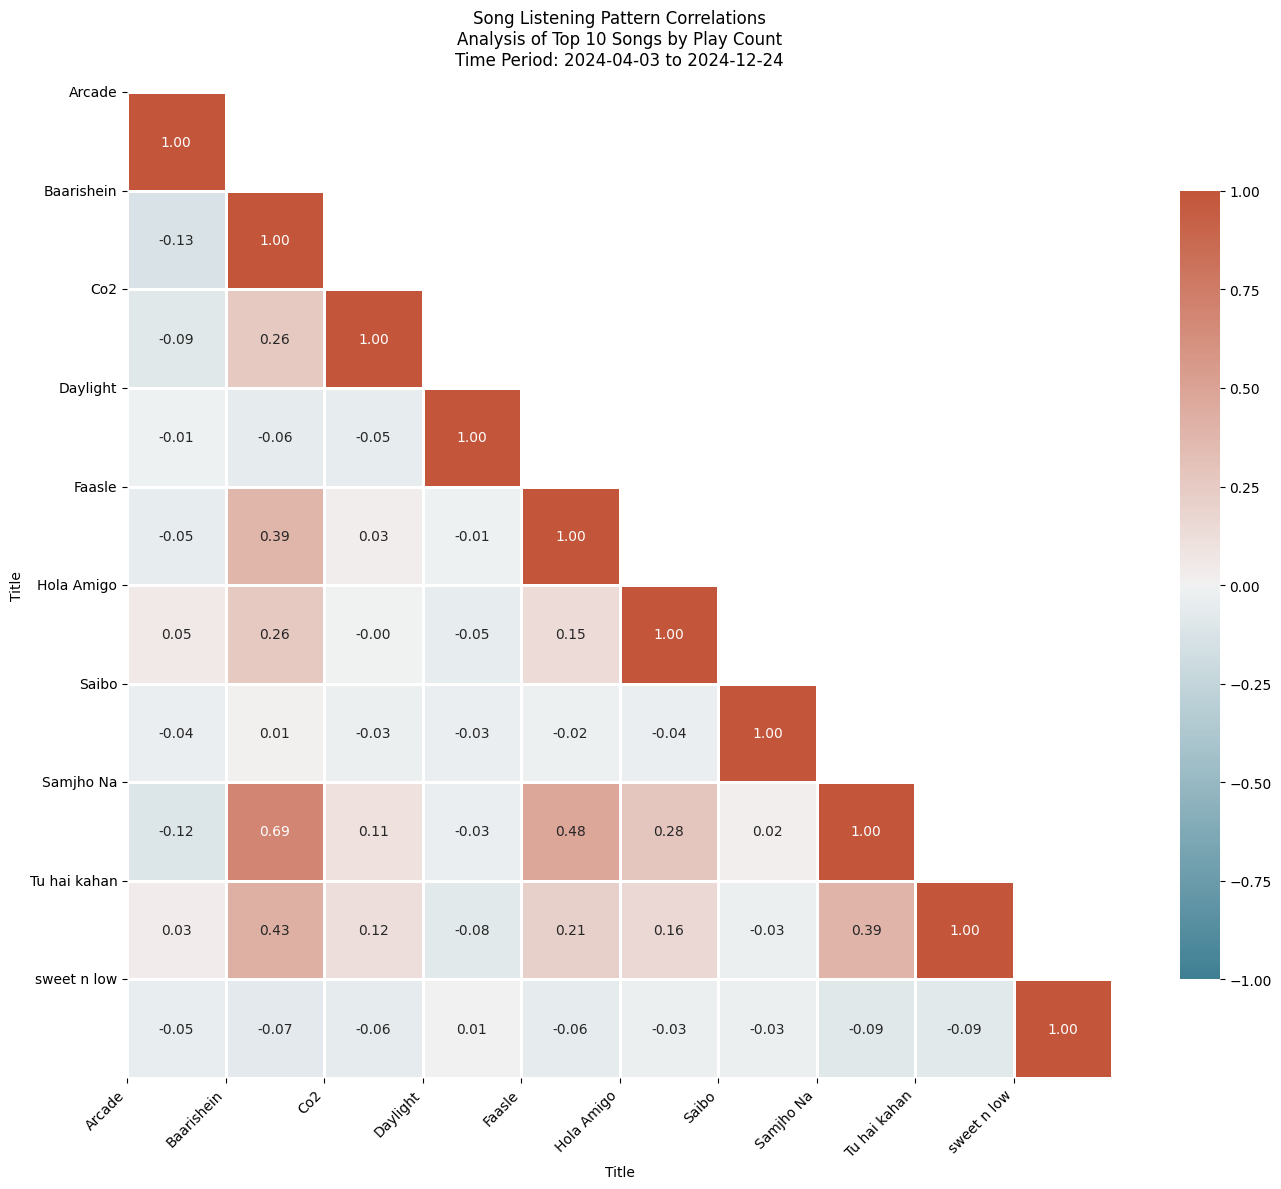

In [62]:
def analyze_song_correlations(df, n_songs=10, min_plays=3):
    """
    Analyze and visualize correlations between song listening patterns

    Parameters:
    - df: DataFrame with columns ['Timestamp_IST', 'Title', 'Artist']
    - n_songs: Number of top songs to analyze
    - min_plays: Minimum number of plays required for correlation analysis

    Returns:
    - fig: matplotlib figure object
    - correlation_matrix: pandas DataFrame of correlations
    - insights: dict containing additional analysis results
    """
    # Get top N songs by play count
    top_songs = df['Title'].value_counts().head(n_songs).index

    # Create daily play counts for each song
    song_pivot = df[df['Title'].isin(top_songs)].groupby(
        [df['Timestamp_IST'].dt.date, 'Title']
    ).size().unstack(fill_value=0)

    # Calculate correlations
    correlation_matrix = song_pivot.corr()

    # Calculate additional metrics
    total_plays = song_pivot.sum()
    active_days = (song_pivot > 0).sum()
    avg_plays_per_day = total_plays / active_days

    # Get artists for top songs
    song_artists = df[df['Title'].isin(top_songs)][['Title', 'Artist']].drop_duplicates()

    # Create visualization
    fig = plt.figure(figsize=(15, 12))

    # Main correlation heatmap
    plt.subplot(1, 1, 1)
    mask = np.triu(np.ones_like(correlation_matrix), k=1)  # Mask upper triangle

    # Custom diverging colormap
    colors = sns.diverging_palette(220, 20, as_cmap=True)

    # Create heatmap
    sns.heatmap(correlation_matrix,
                mask=mask,
                annot=True,
                cmap=colors,
                vmin=-1, vmax=1,
                center=0,
                fmt='.2f',
                square=True,
                linewidths=1,
                cbar_kws={"shrink": .8})

    # Create shortened labels with tooltips
    def shorten_title(title, max_length=20):
        return title if len(title) <= max_length else title[:max_length-3] + '...'

    shortened_labels = [shorten_title(title) for title in correlation_matrix.index]

    # Rotate and align the tick labels so they look better
    plt.xticks(range(len(shortened_labels)), shortened_labels, rotation=45, ha='right')
    plt.yticks(range(len(shortened_labels)), shortened_labels, rotation=0)

    # Add title with summary statistics
    plt.title('Song Listening Pattern Correlations\n' +
              f'Analysis of Top {n_songs} Songs by Play Count\n' +
              f'Time Period: {song_pivot.index.min()} to {song_pivot.index.max()}',
              pad=20)

    # Adjust layout
    plt.tight_layout()

    # Calculate additional insights
    insights = {
        'strongest_correlation': {
            'songs': correlation_matrix.unstack().sort_values(ascending=False)[1:2].index[0],
            'value': correlation_matrix.unstack().sort_values(ascending=False)[1:2].values[0],
            'artists': None  # Will be populated later
        },
        'negative_correlation': {
            'songs': correlation_matrix.unstack().sort_values()[0:1].index[0],
            'value': correlation_matrix.unstack().sort_values()[0:1].values[0],
            'artists': None  # Will be populated later
        },
        'most_consistent': {
            'song': active_days.idxmax(),
            'artist': song_artists[song_artists['Title'] == active_days.idxmax()]['Artist'].iloc[0],
            'active_days': active_days.max()
        },
        'highest_intensity': {
            'song': avg_plays_per_day.idxmax(),
            'artist': song_artists[song_artists['Title'] == avg_plays_per_day.idxmax()]['Artist'].iloc[0],
            'avg_plays': avg_plays_per_day.max()
        }
    }

    # Add artist information to correlations
    for key in ['strongest_correlation', 'negative_correlation']:
        songs = insights[key]['songs']
        insights[key]['artists'] = (
            song_artists[song_artists['Title'] == songs[0]]['Artist'].iloc[0],
            song_artists[song_artists['Title'] == songs[1]]['Artist'].iloc[0]
        )

    return fig, correlation_matrix, insights, song_artists

def print_song_correlation_insights(insights, correlation_matrix, song_artists):
    """
    Print readable insights from the song correlation analysis
    """
    print("Key Insights from Song Correlation Analysis:")
    print("\n1. Strongest Positive Correlation:")
    songs = insights['strongest_correlation']['songs']
    artists = insights['strongest_correlation']['artists']
    value = insights['strongest_correlation']['value']
    print(f"   '{songs[0]}' by {artists[0]}")
    print(f"   '{songs[1]}' by {artists[1]}")
    print(f"   Correlation: {value:.3f}")

    print("\n2. Strongest Negative Correlation:")
    songs = insights['negative_correlation']['songs']
    artists = insights['negative_correlation']['artists']
    value = insights['negative_correlation']['value']
    print(f"   '{songs[0]}' by {artists[0]}")
    print(f"   '{songs[1]}' by {artists[1]}")
    print(f"   Correlation: {value:.3f}")

    print("\n3. Most Consistently Played Song:")
    print(f"   '{insights['most_consistent']['song']}'")
    print(f"   by {insights['most_consistent']['artist']}")
    print(f"   Active on {insights['most_consistent']['active_days']} days")

    print("\n4. Most Intensely Played Song:")
    print(f"   '{insights['highest_intensity']['song']}'")
    print(f"   by {insights['highest_intensity']['artist']}")
    print(f"   Average of {insights['highest_intensity']['avg_plays']:.2f} plays per active day")

    print("\n5. Notable Patterns:")
    # Find clusters of highly correlated songs
    threshold = 0.3
    high_corr = correlation_matrix.unstack()
    high_corr = high_corr[high_corr > threshold]
    high_corr = high_corr[high_corr < 1.0]  # Remove self-correlations

    if len(high_corr) > 0:
        print(f"   Songs with correlation > {threshold}:")
        for idx, corr in high_corr.items():
            song1_artist = song_artists[song_artists['Title'] == idx[0]]['Artist'].iloc[0]
            song2_artist = song_artists[song_artists['Title'] == idx[1]]['Artist'].iloc[0]
            print(f"   - '{idx[0]}' ({song1_artist}) and")
            print(f"     '{idx[1]}' ({song2_artist})")
            print(f"     Correlation: {corr:.3f}\n")

# Example usage:
# Assuming df is your DataFrame with columns ['Timestamp_IST', 'Title', 'Artist']
fig, corr_matrix, insights, song_artists = analyze_song_correlations(df, n_songs=10, min_plays=3)
print_song_correlation_insights(insights, corr_matrix, song_artists)
plt.show()

Song Transition Analysis Insights:

1. Strongest Song Transitions:

   1. From: 'HUSN' by Anuv Jain
      To:   'Tu hai kahan' by AUR
      Probability: 22.58%

   2. From: 'Baarishein' by Anuv Jain
      To:   'Tu hai kahan' by AUR
      Probability: 18.26%

   3. From: 'Baarishein' by Anuv Jain
      To:   'Faasle' by Aditya Rikhari
      Probability: 17.39%

   4. From: 'Samjho Na' by Aditya Rikhari
      To:   'Baarishein' by Anuv Jain
      Probability: 17.27%

   5. From: 'Tu hai kahan' by AUR
      To:   'Faasle' by Aditya Rikhari
      Probability: 16.67%

2. Transition Timing:
   - Average time between songs: 200.7 minutes
   - Median time between songs: 6.0 minutes
   - Quick transitions (<1 min): 0.2%

3. Artist Transition Patterns:
   - Same artist transitions: 3.1%
   - Different artist transitions: 96.9%


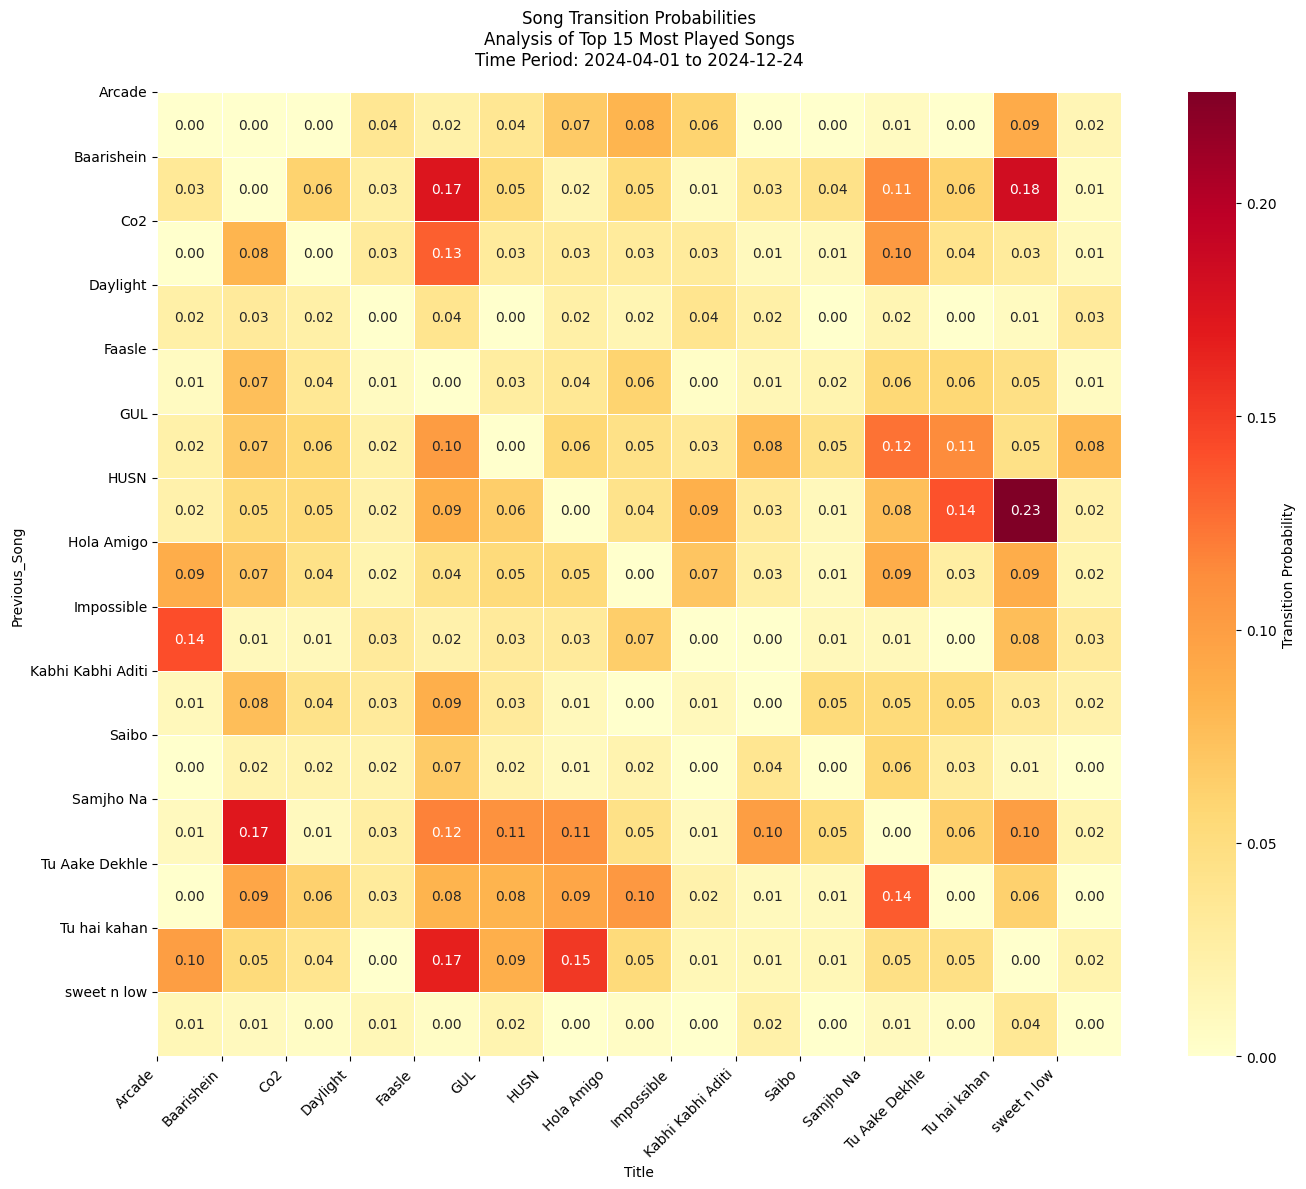

In [63]:
def analyze_song_transitions(df, top_n=15, min_transitions=2):
    df_analysis = df.copy()

    top_songs = df_analysis['Title'].value_counts().head(top_n).index

    df_analysis = df_analysis[df_analysis['Title'].isin(top_songs)]

    df_analysis['Previous_Song'] = df_analysis['Title'].shift(1)
    df_analysis['Previous_Artist'] = df_analysis['Artist'].shift(1)
    df_analysis['Time_Diff'] = df_analysis['Timestamp_IST'].diff()

    transition_matrix = df_analysis.groupby(['Previous_Song', 'Title']).size().unstack(fill_value=0)

    transition_probs = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

    np.fill_diagonal(transition_probs.values, 0)

    fig = plt.figure(figsize=(15, 12))

    def shorten_title(title, max_length=25):
        return title if len(title) <= max_length else title[:max_length-3] + '...'

    shortened_labels = [shorten_title(title) for title in transition_probs.index]

    sns.heatmap(transition_probs,
                cmap='YlOrRd',
                annot=True,
                fmt='.2f',
                square=True,
                linewidths=0.5,
                cbar_kws={'label': 'Transition Probability'})

    plt.xticks(range(len(shortened_labels)), shortened_labels, rotation=45, ha='right')
    plt.yticks(range(len(shortened_labels)), shortened_labels, rotation=0)

    plt.title('Song Transition Probabilities\n' +
              f'Analysis of Top {top_n} Most Played Songs\n' +
              f'Time Period: {df_analysis["Timestamp_IST"].min().date()} to {df_analysis["Timestamp_IST"].max().date()}',
              pad=20)

    plt.tight_layout()

    insights = calculate_transition_insights(df_analysis, transition_probs, min_transitions)

    return fig, transition_probs, insights

def calculate_transition_insights(df, transition_probs, min_transitions):
    song_artists = df[['Title', 'Artist']].drop_duplicates().set_index('Title')['Artist']

    strongest_transitions = []
    for prev_song in transition_probs.index:
        for next_song in transition_probs.columns:
            if prev_song != next_song and transition_probs.loc[prev_song, next_song] >= min_transitions/100:
                strongest_transitions.append({
                    'from_song': prev_song,
                    'from_artist': song_artists[prev_song],
                    'to_song': next_song,
                    'to_artist': song_artists[next_song],
                    'probability': transition_probs.loc[prev_song, next_song]
                })

    strongest_transitions.sort(key=lambda x: x['probability'], reverse=True)

    df['transition_time'] = df['Time_Diff'].dt.total_seconds() / 60

    time_insights = {
        'avg_transition_time': df['transition_time'].mean(),
        'median_transition_time': df['transition_time'].median(),
        'quick_transitions': (df['transition_time'] < 1).mean() * 100
    }

    same_artist_transitions = df[
        (df['Previous_Artist'] == df['Artist']) &
        (df['Previous_Song'] != df['Title'])
    ].shape[0] / df.shape[0] * 100

    return {
        'strongest_transitions': strongest_transitions[:5],
        'time_insights': time_insights,
        'same_artist_ratio': same_artist_transitions
    }

def print_transition_insights(insights):

    print("Song Transition Analysis Insights:")

    print("\n1. Strongest Song Transitions:")
    for idx, trans in enumerate(insights['strongest_transitions'], 1):
        print(f"\n   {idx}. From: '{trans['from_song']}' by {trans['from_artist']}")
        print(f"      To:   '{trans['to_song']}' by {trans['to_artist']}")
        print(f"      Probability: {trans['probability']:.2%}")

    print("\n2. Transition Timing:")
    time_insights = insights['time_insights']
    print(f"   - Average time between songs: {time_insights['avg_transition_time']:.1f} minutes")
    print(f"   - Median time between songs: {time_insights['median_transition_time']:.1f} minutes")
    print(f"   - Quick transitions (<1 min): {time_insights['quick_transitions']:.1f}%")

    print(f"\n3. Artist Transition Patterns:")
    print(f"   - Same artist transitions: {insights['same_artist_ratio']:.1f}%")
    print(f"   - Different artist transitions: {100 - insights['same_artist_ratio']:.1f}%")


fig, transition_matrix, insights = analyze_song_transitions(df, top_n=15, min_transitions=2)
print_transition_insights(insights)
plt.show()

## Clustering Analysis

Starting hierarchical clustering analysis...


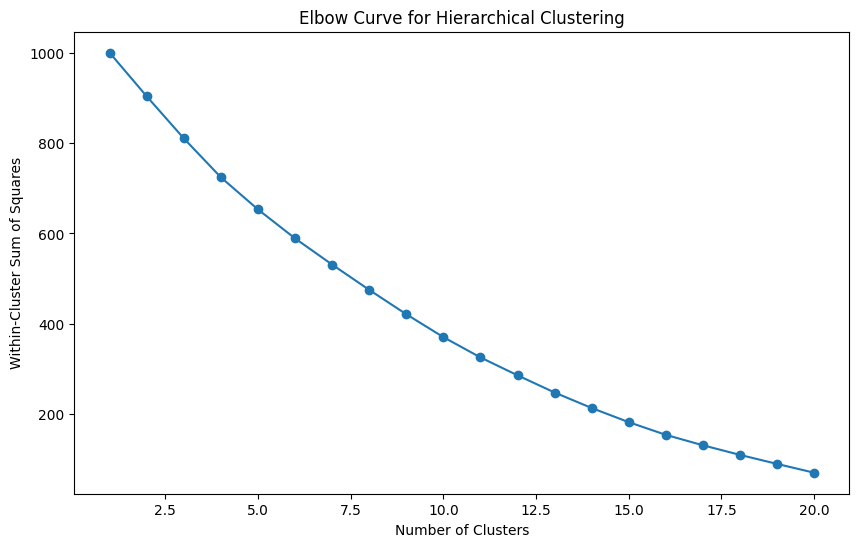

Extracting artist features...
Creating dendrograms...


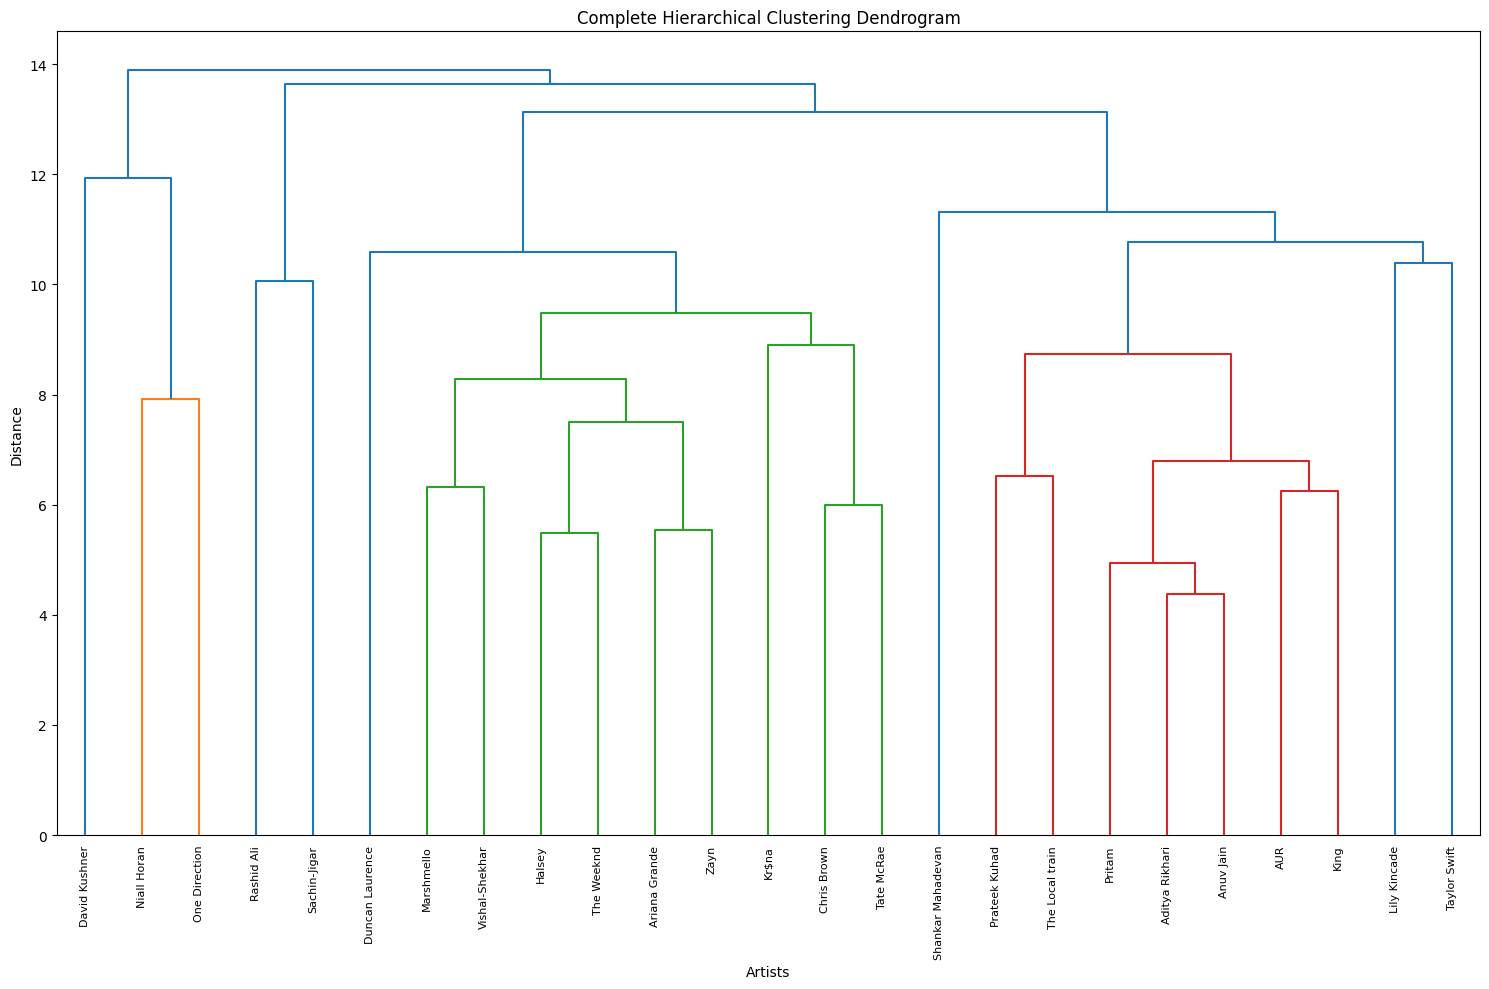

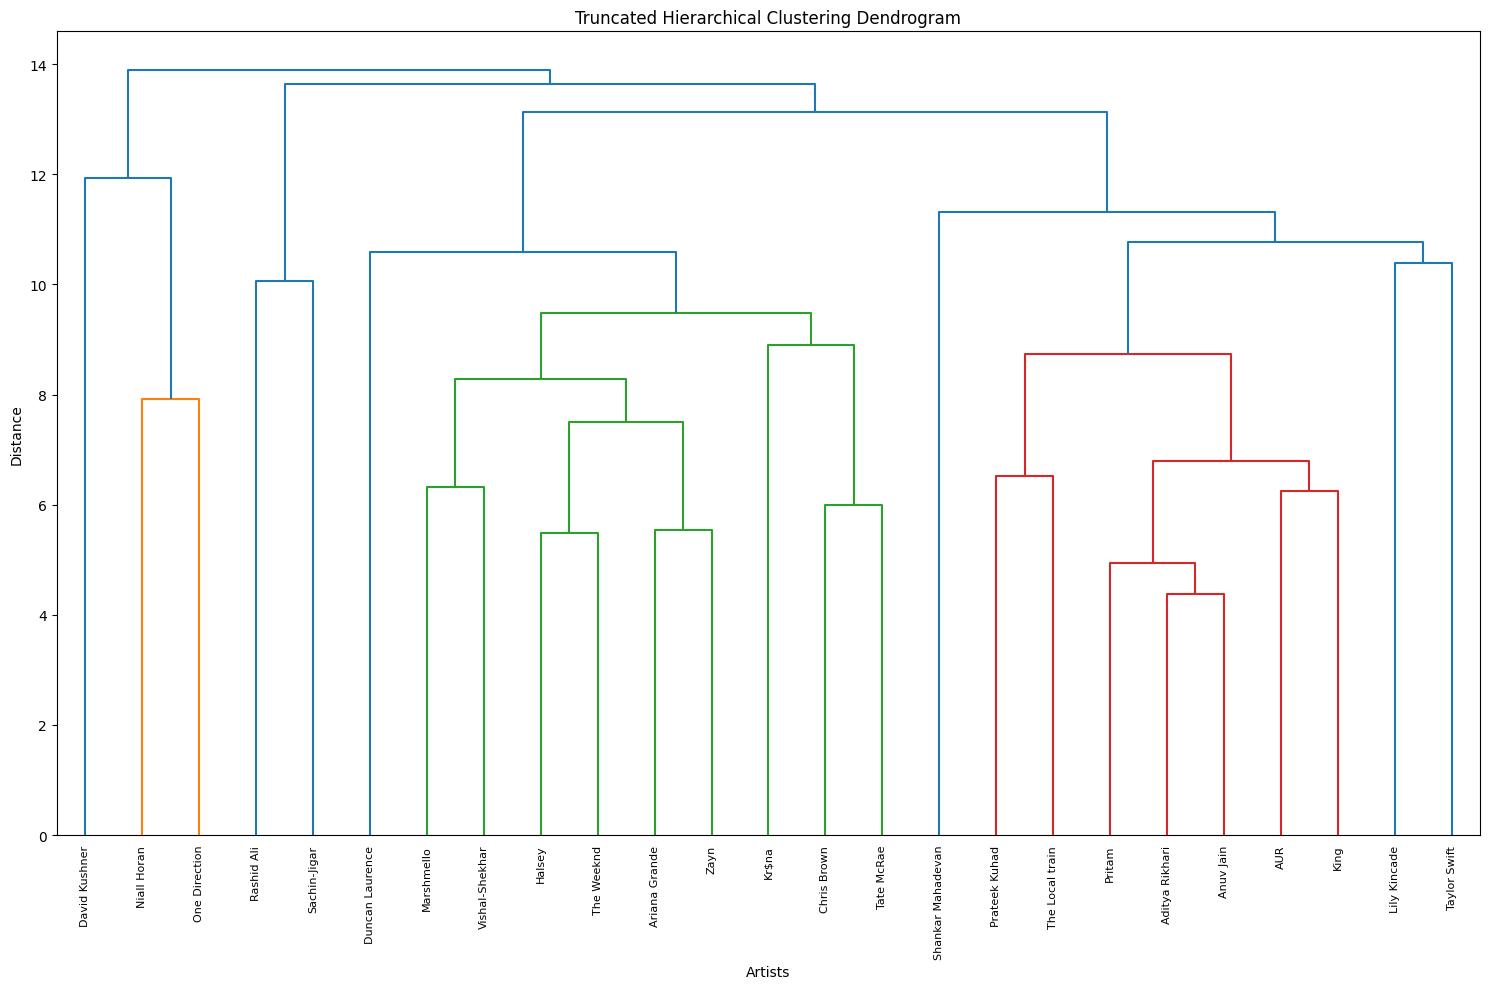

Analyzing clusters...
Creating cluster heatmap...


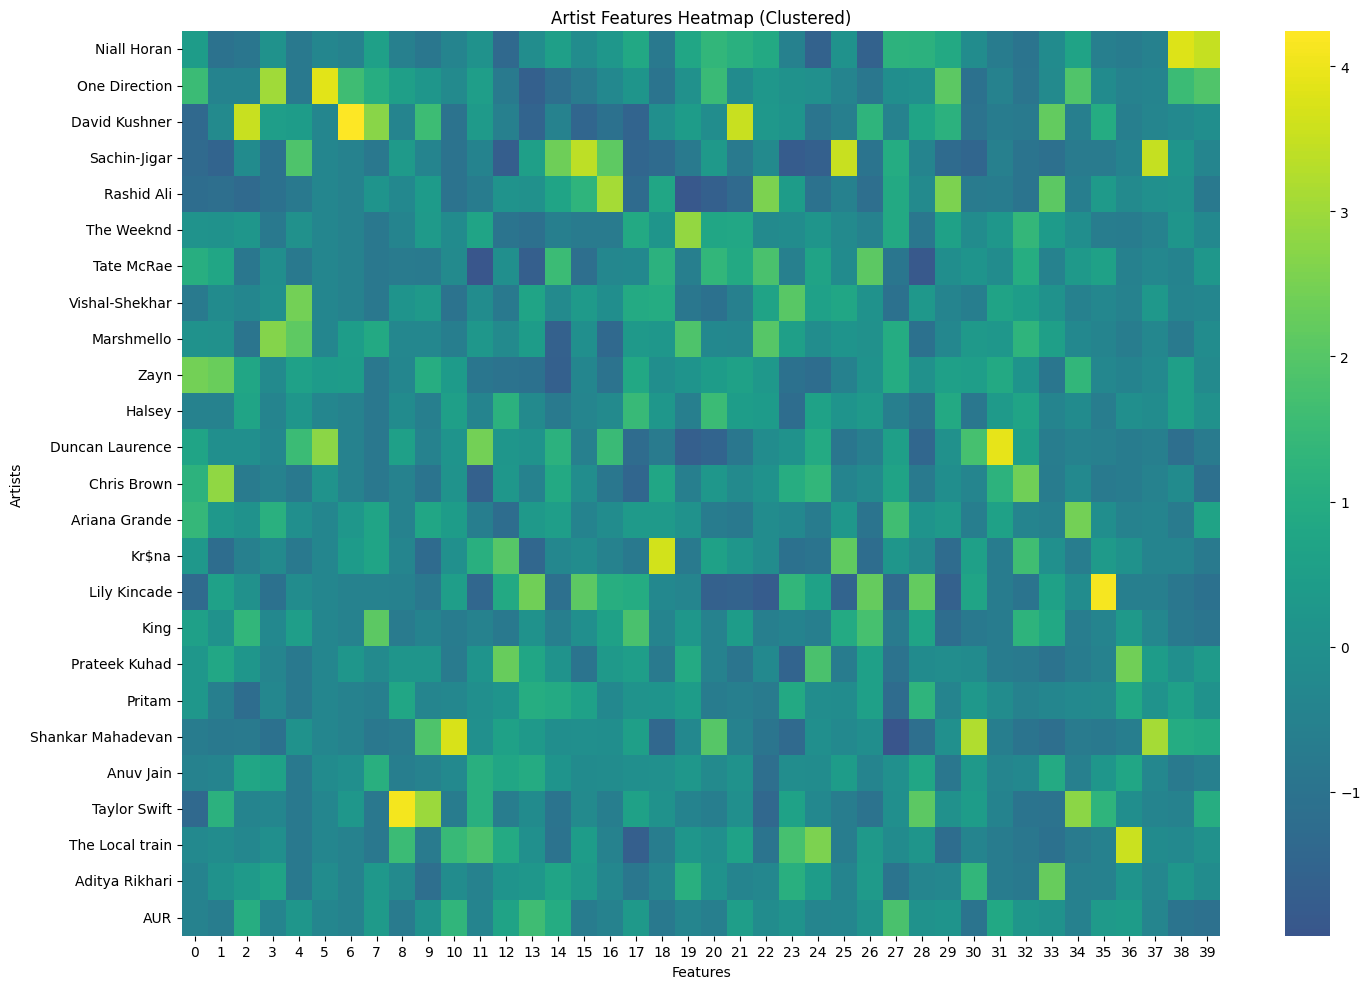


Cluster Analysis:
   Cluster  Size                                            Artists  \
0        1     2                         Niall Horan, One Direction   
1        2     1                                      David Kushner   
2        3     2                           Rashid Ali, Sachin-Jigar   
3        4    10  Ariana Grande, Chris Brown, Duncan Laurence, H...   
4        5    10  AUR, Aditya Rikhari, Anuv Jain, King, Lily Kin...   

   Percentage  
0         8.0  
1         4.0  
2         8.0  
3        40.0  
4        40.0  


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import datetime as dt

def extract_artist_features(df):
    hourly_patterns = pd.crosstab(df['Artist'], df['Timestamp_IST'].dt.hour)

    daily_patterns = pd.crosstab(df['Artist'], df['Timestamp_IST'].dt.dayofweek)

    monthly_patterns = pd.crosstab(df['Artist'], df['Timestamp_IST'].dt.month)

    hourly_normalized = hourly_patterns.div(hourly_patterns.sum(axis=1), axis=0)
    daily_normalized = daily_patterns.div(daily_patterns.sum(axis=1), axis=0)
    monthly_normalized = monthly_patterns.div(monthly_patterns.sum(axis=1), axis=0)

    features = pd.concat([
        hourly_normalized,
        daily_normalized,
        monthly_normalized
    ], axis=1)

    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    return scaled_features, features.index

def plot_complete_dendrogram(features, artist_names, title="Complete Hierarchical Clustering Dendrogram"):
    plt.figure(figsize=(15, 10))

    linkage_matrix = linkage(features, method='ward', metric='euclidean')

    dendrogram(linkage_matrix,
              labels=artist_names,
              leaf_rotation=90,
              leaf_font_size=8)

    plt.title(title)
    plt.xlabel('Artists')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

    return linkage_matrix

def plot_truncated_dendrogram(features, artist_names, max_d=None, title="Truncated Hierarchical Clustering Dendrogram"):
    plt.figure(figsize=(15, 10))

    linkage_matrix = linkage(features, method='ward', metric='euclidean')

    dendrogram(linkage_matrix,
              labels=artist_names,
              leaf_rotation=90,
              leaf_font_size=8,
              truncate_mode='lastp',
              p=30,
              show_contracted=True)

    if max_d:
        plt.axhline(y=max_d, c='k', linestyle='--')

    plt.title(title)
    plt.xlabel('Artists')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

    return linkage_matrix

def analyze_hierarchical_clusters(features, artist_names, linkage_matrix, n_clusters):
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    cluster_df = pd.DataFrame({
        'Artist': artist_names,
        'Cluster': clusters
    })

    cluster_analysis = []
    for cluster_id in range(1, n_clusters + 1):
        cluster_artists = cluster_df[cluster_df['Cluster'] == cluster_id]['Artist']

        analysis = {
            'Cluster': cluster_id,
            'Size': len(cluster_artists),
            'Artists': ', '.join(cluster_artists[:5]) +
                      (f' and {len(cluster_artists)-5} more' if len(cluster_artists) > 5 else ''),
            'Percentage': (len(cluster_artists) / len(artist_names)) * 100
        }
        cluster_analysis.append(analysis)

    return pd.DataFrame(cluster_analysis)

def plot_cluster_heatmap(features, artist_names, linkage_matrix, n_clusters):
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    feature_df = pd.DataFrame(features, index=artist_names)
    feature_df['Cluster'] = clusters

    feature_df = feature_df.sort_values('Cluster')

    plt.figure(figsize=(15, 10))
    sns.heatmap(feature_df.iloc[:, :-1],
                yticklabels=feature_df.index,
                cmap='viridis',
                center=0)
    plt.title('Artist Features Heatmap (Clustered)')
    plt.xlabel('Features')
    plt.ylabel('Artists')
    plt.tight_layout()
    plt.show()

def perform_hierarchical_clustering(df, n_clusters=5):
    print("Extracting artist features...")
    features, artist_names = extract_artist_features(df)

    print("Creating dendrograms...")
    linkage_matrix = plot_complete_dendrogram(features, artist_names)

    plot_truncated_dendrogram(features, artist_names)

    print("Analyzing clusters...")
    cluster_analysis = analyze_hierarchical_clusters(features, artist_names,
                                                   linkage_matrix, n_clusters)

    print("Creating cluster heatmap...")
    plot_cluster_heatmap(features, artist_names, linkage_matrix, n_clusters)

    return {
        'linkage_matrix': linkage_matrix,
        'cluster_analysis': cluster_analysis,
        'features': features,
        'artist_names': artist_names
    }

def plot_elbow_curve(features):
    max_clusters = min(20, len(features))
    distances = []

    for k in range(1, max_clusters + 1):
        clusters = fcluster(linkage(features, method='ward'), k, criterion='maxclust')
        distances.append(compute_cluster_distance(features, clusters))

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), distances, marker='o')
    plt.title('Elbow Curve for Hierarchical Clustering')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares')
    plt.show()

def compute_cluster_distance(features, clusters):
    total_distance = 0
    for cluster_id in np.unique(clusters):
        cluster_points = features[clusters == cluster_id]
        centroid = cluster_points.mean(axis=0)
        total_distance += np.sum((cluster_points - centroid) ** 2)
    return total_distance

print("Starting hierarchical clustering analysis...")

features, artist_names = extract_artist_features(df_top_25_artists)
plot_elbow_curve(features)

results = perform_hierarchical_clustering(df_top_25_artists, n_clusters=5)

print("\nCluster Analysis:")
print(results['cluster_analysis'])